# Telecom Churn Case Study 

### Problem Statement:

In the telecom industry, customers are able to switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

It is very improtant to retain the high value customers and is one of the number one business goal.
In order to predict the customer churn on High value customers, it is necessary to build models, identify the predictor attributes help business understand on churn.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFECV, RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Reading the dataset
teldata = pd.read_csv("telecom_churn_data.csv")

In [3]:
#Printing the top 5 rows
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
teldata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#Printing the shape of the dataset
teldata.shape

(99999, 226)

In [5]:
#Getting the description of all the numeric columns
teldata.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

Handling Missing values 


In [6]:
#Percentage of missing values
missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
missingdata.reset_index(inplace=True)
missingdata.rename(columns={'index':'Feature',0:'Missing %'}, inplace=True)

In [7]:
missingdata.sort_values(by='Missing %',ascending=False)

,Feature,Missing %
189,arpu_3g_6,74.846748
197,night_pck_user_6,74.846748
161,total_rech_data_6,74.846748
193,arpu_2g_6,74.846748
165,max_rech_data_6,74.846748
217,fb_user_6,74.846748
177,av_rech_amt_data_6,74.846748
157,date_of_last_rech_data_6,74.846748
169,count_rech_2g_6,74.846748
173,count_rech_3g_6,74.846748


In [8]:
missingdata[missingdata['Missing %']>0].count()

Feature      166
Missing %    166
dtype: int64

The "rech" columns have some values missing, indicating that users haven't made any recharges. To handle this, we should fill those missing values with zeros.

In [9]:
#Columns containing the string 'rech_data' or 'rech_amt' 
rech_columns = teldata.columns[teldata.columns.str.contains('rech_data|rech_amt')]

In [10]:
rech_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

The Above columns are:

Total recharge amount,
Total recharge for data,
Maximum recharge amount,
Last date of Recharging the data,
Average recharge amount for data

In [11]:
teldata.loc[:, rech_columns].describe(include="all")

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153,25571,26339,25922,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,31,31,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/29/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1888,1813,1998,2329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,NaN,NaN,NaN,NaN,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,NaN,NaN,NaN,NaN,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000


In [12]:
#Imputing missing values with 0
teldata[rech_columns] = teldata[rech_columns].apply(lambda x: x.fillna(0)) 

In [13]:
missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
missingdata.reset_index(inplace=True)
missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)

In [14]:
missingdata[missingdata['Missing%']>0].count()

Feature     150
Missing%    150
dtype: int64

In [15]:
# Dropping columns with missing values > 30% threshold
cols_to_drop = missingdata[missingdata['Missing%'] >=30]
cols_to_drop

,Feature,Missing%
169,count_rech_2g_6,74.846748
170,count_rech_2g_7,74.428744
171,count_rech_2g_8,73.660737
172,count_rech_2g_9,74.077741
173,count_rech_3g_6,74.846748
174,count_rech_3g_7,74.428744
175,count_rech_3g_8,73.660737
176,count_rech_3g_9,74.077741
189,arpu_3g_6,74.846748
190,arpu_3g_7,74.428744


In [16]:
cols_drop = cols_to_drop.Feature.values


In [17]:
teldata.drop(columns= cols_drop, axis=1, inplace=True)

In [18]:
final_missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
final_missingdata.reset_index(inplace=True)
final_missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)
final_missingdata.sort_values(by='Missing%', ascending=False)

,Feature,Missing%
36,loc_og_t2m_mou_9,7.745077
88,loc_ic_t2t_mou_9,7.745077
44,loc_og_t2c_mou_9,7.745077
100,loc_ic_mou_9,7.745077
96,loc_ic_t2f_mou_9,7.745077
72,isd_og_mou_9,7.745077
104,std_ic_t2t_mou_9,7.745077
32,loc_og_t2t_mou_9,7.745077
48,loc_og_mou_9,7.745077
92,loc_ic_t2m_mou_9,7.745077


In [19]:
# Dropping unwanted columns
date_cols = ['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9', 'mobile_number']
teldata.drop(date_cols, axis=1, inplace=True)


In [20]:
final_missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
final_missingdata.reset_index(inplace=True)
final_missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)
final_missingdata.sort_values(by='Missing%', ascending=False)

,Feature,Missing%
94,loc_ic_mou_9,7.745077
26,loc_og_t2t_mou_9,7.745077
34,loc_og_t2f_mou_9,7.745077
38,loc_og_t2c_mou_9,7.745077
42,loc_og_mou_9,7.745077
46,std_og_t2t_mou_9,7.745077
50,std_og_t2m_mou_9,7.745077
54,std_og_t2f_mou_9,7.745077
62,std_og_mou_9,7.745077
66,isd_og_mou_9,7.745077


In [21]:
# Imputing remaining missing values with median 
remaining_missing_Values_cols = final_missingdata[final_missingdata['Missing%']>0].Feature.values
for i in remaining_missing_Values_cols:
    teldata[i] = teldata[i].fillna(teldata[i].median())

In [22]:
final_missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
final_missingdata.reset_index(inplace=True)
final_missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)
final_missingdata.sort_values(by='Missing%', ascending=False)

,Feature,Missing%
0,loc_og_t2o_mou,0.0
129,ic_others_8,0.0
120,spl_ic_mou_7,0.0
121,spl_ic_mou_8,0.0
122,spl_ic_mou_9,0.0
123,isd_ic_mou_6,0.0
124,isd_ic_mou_7,0.0
125,isd_ic_mou_8,0.0
126,isd_ic_mou_9,0.0
127,ic_others_6,0.0


In [23]:
teldata.shape

(99999, 188)

### Fitering high-value customers

Those who have recharged with an amount more than 70th percentile of the average recharge amount in the first 2 months

In [24]:
#total data recharge amount
teldata['total_data_rech_6'] = teldata.total_rech_data_6 * teldata.av_rech_amt_data_6
teldata['total_data_rech_7'] = teldata.total_rech_data_7 * teldata.av_rech_amt_data_7

In [25]:
# adding 'total_data_rech' + 'total_rech_amt'
teldata['amt_data_6'] = teldata.total_data_rech_6 + teldata.total_rech_amt_6
teldata['amt_data_7'] = teldata.total_data_rech_7 + teldata.total_rech_amt_7

In [26]:
# avg amt of june and july
teldata['av_amt_data_6_7']=(teldata.amt_data_6 + teldata.amt_data_7)/2

In [27]:
#70th Percentile of avg recharge amount of june/july('good phase')
high_value = teldata.av_amt_data_6_7.quantile(0.70)
print("The recharge amount at 70th percentile: ", high_value)

The recharge amount at 70th percentile:  478.0


In [28]:
highvaldata = teldata.loc[teldata.av_amt_data_6_7 >= high_value,:]
highvaldata = highvaldata.reset_index(drop=True)
highvaldata.shape

(30001, 193)

In [29]:
#drop features created for arriving at high value customers
highvaldata = highvaldata.drop(columns=['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7',
                                       'av_amt_data_6_7'], axis=1)

In [30]:
print(highvaldata.shape)

(30001, 188)


Tagging Churn Customers
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9 

total_og_mou_9 

vol_2g_mb_9 

vol_3g_mb_9

In [31]:
highvaldata['total_ic_og_mou_9'] = highvaldata.total_ic_mou_9 + highvaldata.total_og_mou_9

In [32]:
#computing 2g & 3g data usage
highvaldata['total_2g_3g_mb_9'] = highvaldata.vol_2g_mb_9 + highvaldata.vol_3g_mb_9

In [33]:
# creating 'churn' variable: Where the customers who have not used any data and calling services in september are said to be churned
highvaldata['churn'] = highvaldata.apply(lambda x: 1 if(x.total_ic_og_mou_9==0 and x.total_2g_3g_mb_9==0) else 0, axis=1)

In [34]:
# drop columns
highvaldata.drop(columns=['total_ic_og_mou_9','total_2g_3g_mb_9'], axis=1, inplace=True)

Outlier Handling: Capping

In [35]:
# Capping the outliers for all numeric columns to cap for >Q1 &<Q3 , where Q1 & Q3 are top & bottom 1%.
numeric_columns = highvaldata.iloc[:,2:].columns
for i in numeric_columns:
    Q1 = highvaldata[i].quantile(0.01)
    Q3= highvaldata[i].quantile(0.99)
    IQR = Q3-Q1
    highvaldata = highvaldata.loc[(highvaldata[i]>= Q1-1.5*IQR) & (highvaldata[i]<=Q3+1.5*IQR)]

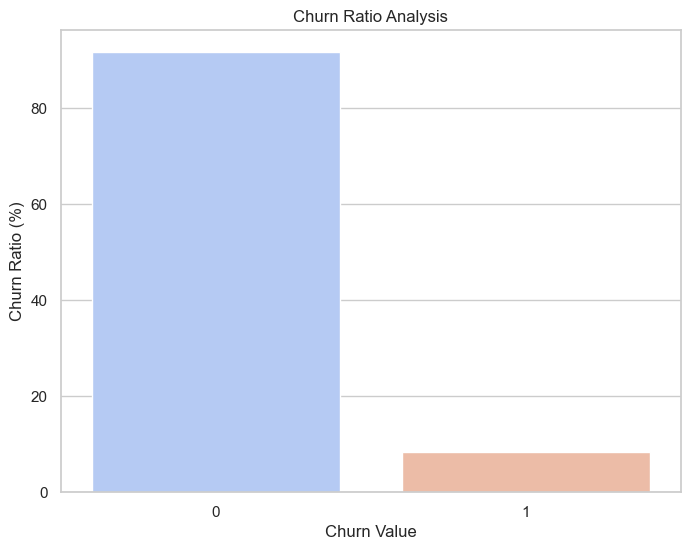

In [36]:
churn_ratio = pd.DataFrame(highvaldata.churn.value_counts(normalize=True) * 100)
churn_ratio['churn_value'] = [0, 1]
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=churn_ratio['churn_value'], y=churn_ratio.churn, palette="coolwarm")
plt.xlabel('Churn Value')
plt.ylabel('Churn Ratio (%)')
plt.title('Churn Ratio Analysis')
plt.show()


In [37]:
# Dropping columns related to 9th month after tagging churners
sept_columns = highvaldata.columns[highvaldata.columns.str.contains('_9')]
sept_columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [38]:
highvaldata.drop(columns=sept_columns, axis=1, inplace=True)

In [39]:
# dropping sep_vbc_3g column
highvaldata.drop(columns=['sep_vbc_3g'], axis=1, inplace=True)

### Derived variables

In [40]:
# Derived Variable - 1 : Deriving AON(Age on Network)/365 to get Customer tenurity interms of years.
highvaldata['aon_Years'] = highvaldata['aon'].apply(lambda x : round((x/365),1))

In [41]:
# Derived Variable - 2: Total_loc_MOU(Minutes of Usage) (local_incoming_mou+local_outgoing_mou)
for i in range(6,9):
    highvaldata['Total_loc_mou_'+str(i)] = (highvaldata['loc_ic_mou_'+str(i)])+(highvaldata['loc_og_mou_'+str(i)])

In [42]:
# Derived Variable - 3: Total_roam_MOU(Minutes of USage) ( roaming_incoming_mou+roaming_outgoing_mou)
for i in range(6,9):
    highvaldata['Total_roam_mou_'+str(i)] = (highvaldata['roam_ic_mou_'+str(i)])+(highvaldata['roam_og_mou_'+str(i)])

In [43]:
highvaldata.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
0,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,2.7,157.27,156.235,5.44,0.00,0.00,0.0
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,2.2,850.04,889.140,443.83,39.97,46.08,69.7
2,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0

In [44]:
highvaldata.shape

(26015, 150)

In [45]:
col_6 = list(highvaldata.columns[highvaldata.columns.str.contains('_6')])
col_7 = list(highvaldata.columns[highvaldata.columns.str.contains('_7')])
col_8 = list(highvaldata.columns[highvaldata.columns.str.contains('_8')])

In [46]:
#Creating column list with prefix 'diff'
diff_list = []

for col6 in col_6:
    txt = col6
    size = len(txt)
    rep = '_diff'
    txt = txt.replace(txt[size - 2:], rep)
    diff_list.append(txt)
diff_list

['arpu_diff',
 'onnet_mou_diff',
 'offnet_mou_diff',
 'roam_ic_mou_diff',
 'roam_og_mou_diff',
 'loc_og_t2t_mou_diff',
 'loc_og_t2m_mou_diff',
 'loc_og_t2f_mou_diff',
 'loc_og_t2c_mou_diff',
 'loc_og_mou_diff',
 'std_og_t2t_mou_diff',
 'std_og_t2m_mou_diff',
 'std_og_t2f_mou_diff',
 'std_og_t2c_mou_diff',
 'std_og_mou_diff',
 'isd_og_mou_diff',
 'spl_og_mou_diff',
 'og_others_diff',
 'total_og_mou_diff',
 'loc_ic_t2t_mou_diff',
 'loc_ic_t2m_mou_diff',
 'loc_ic_t2f_mou_diff',
 'loc_ic_mou_diff',
 'std_ic_t2t_mou_diff',
 'std_ic_t2m_mou_diff',
 'std_ic_t2f_mou_diff',
 'std_ic_t2o_mou_diff',
 'std_ic_mou_diff',
 'total_ic_mou_diff',
 'spl_ic_mou_diff',
 'isd_ic_mou_diff',
 'ic_others_diff',
 'total_rech_num_diff',
 'total_rech_amt_diff',
 'max_rech_amt_diff',
 'last_day_rch_amt_diff',
 'total_rech_data_diff',
 'max_rech_data_diff',
 'av_rech_amt_data_diff',
 'vol_2g_mb_diff',
 'vol_3g_mb_diff',
 'monthly_2g_diff',
 'sachet_2g_diff',
 'monthly_3g_diff',
 'sachet_3g_diff',
 'Total_loc_mou_d

In [47]:
#Getting the difference between 8th month and Average of the sum of 6th and 7th month
for cols, col6, col7, col8 in zip(diff_list, col_6, col_7, col_8):
    highvaldata[cols] = highvaldata[col8] - ((highvaldata[col6] + highvaldata[col7]) / 2)

In [48]:
#Validating the 'diff' column
highvaldata[['onnet_mou_diff', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']]

,onnet_mou_diff,onnet_mou_6,onnet_mou_7,onnet_mou_8
0,-33.320,34.31,32.33,0.00
1,-3.970,57.84,54.68,52.29
2,-347.280,413.69,351.03,35.08
3,-32.120,102.41,132.11,85.14
4,-16.230,48.96,50.66,33.58
...,...,...,...,...
29996,49.380,78.68,29.04,103.24
29997,-297.200,423.99,181.83,5.71
29998,97.365,806.73,549.36,775.41
29999,-184.715,199.89,174.46,2.46


In [49]:
#Shape of the data after 
highvaldata.shape

(26015, 197)

### EDA

In [50]:
highvaldata.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26015 entries, 0 to 30000
Data columns (total 197 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    loc_og_t2o_mou         float64
 1    std_og_t2o_mou         float64
 2    loc_ic_t2o_mou         float64
 3    arpu_6                 float64
 4    arpu_7                 float64
 5    arpu_8                 float64
 6    onnet_mou_6            float64
 7    onnet_mou_7            float64
 8    onnet_mou_8            float64
 9    offnet_mou_6           float64
 10   offnet_mou_7           float64
 11   offnet_mou_8           float64
 12   roam_ic_mou_6          float64
 13   roam_ic_mou_7          float64
 14   roam_ic_mou_8          float64
 15   roam_og_mou_6          float64
 16   roam_og_mou_7          float64
 17   roam_og_mou_8          float64
 18   loc_og_t2t_mou_6       float64
 19   loc_og_t2t_mou_7       float64
 20   loc_og_t2t_mou_8       float64
 21   loc_og_t2m_mou_6       float64
 2

## Univariate Analysis

In [51]:
# Function to create histograms
def uni(col1, col2, title):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
    fig.suptitle(title, fontsize=20)
    sns.histplot(highvaldata[col1], ax=axes[0], kde=True, color='skyblue')
    axes[0].set_xlabel(col1)
    axes[0].set_ylabel('Density')
    sns.histplot(highvaldata[col2], ax=axes[1], kde=True, color='salmon')
    axes[1].set_xlabel(col2)
    axes[1].set_ylabel('Density')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Outgoing Vs Incoming

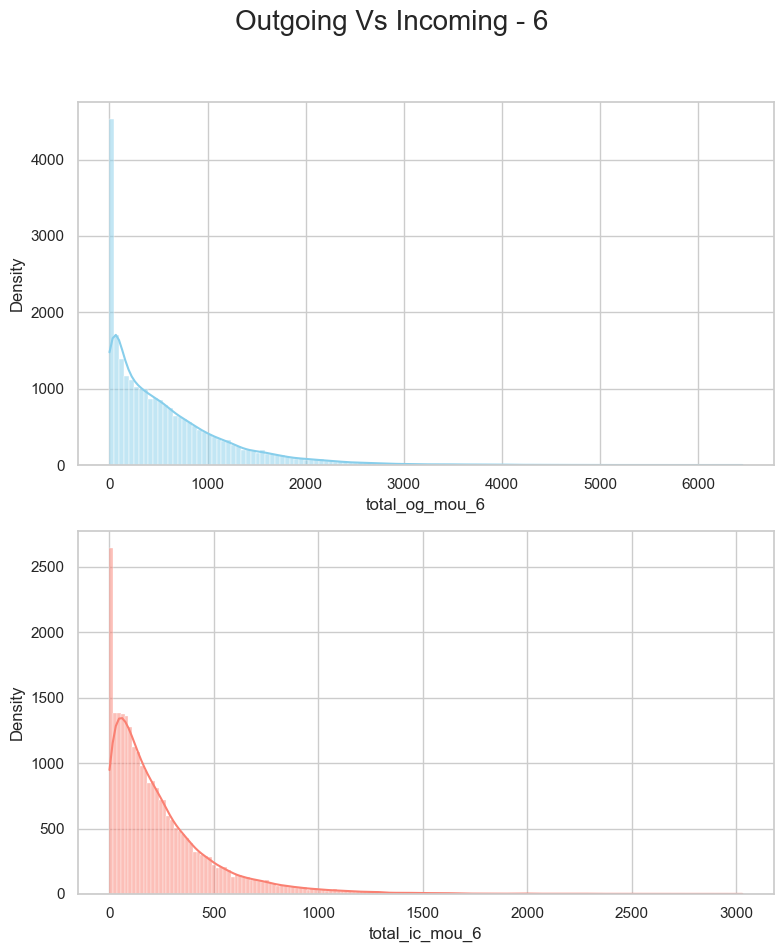

In [52]:
uni('total_og_mou_6','total_ic_mou_6',
    "Outgoing Vs Incoming - 6")

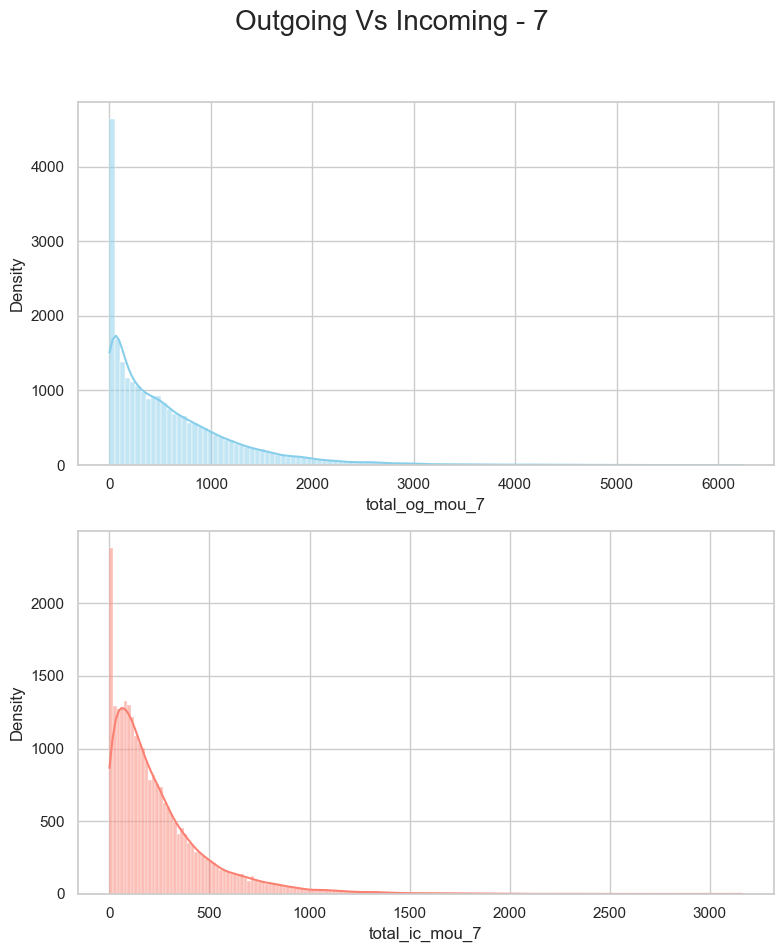

In [53]:
uni('total_og_mou_7','total_ic_mou_7',"Outgoing Vs Incoming - 7")

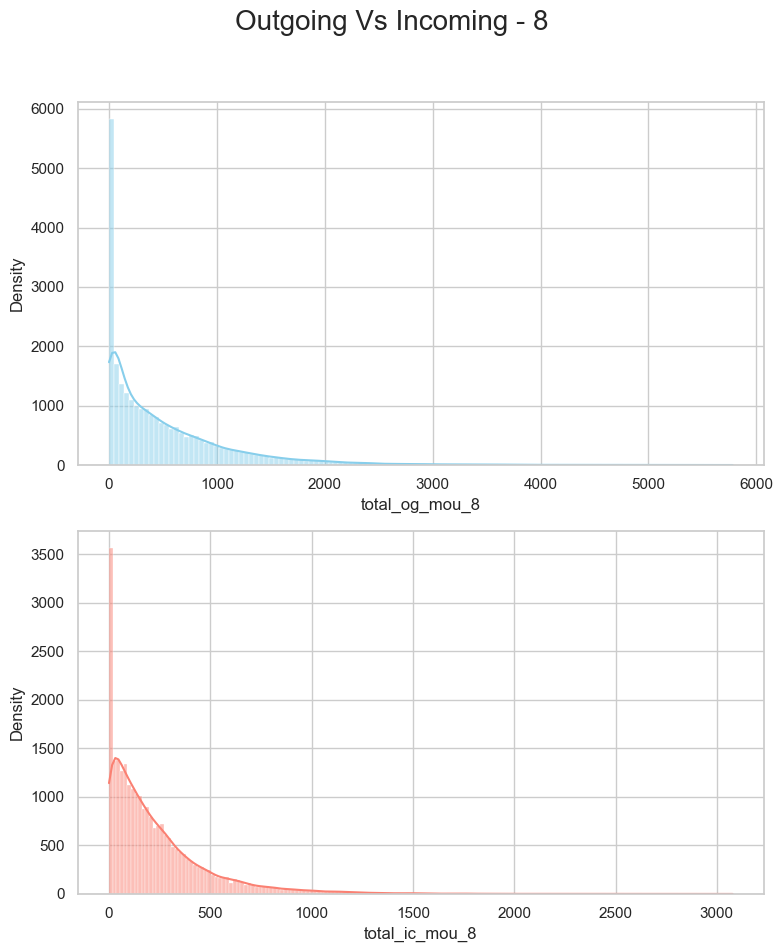

In [54]:
uni('total_og_mou_8','total_ic_mou_8',"Outgoing Vs Incoming - 8")

we can conclude that the number of outgoing calls is nearly twice that of incoming calls. Additionally, it's noticeable that the data is skewed towards the left side.

#### Normal Recharge Vs Internet Recharge

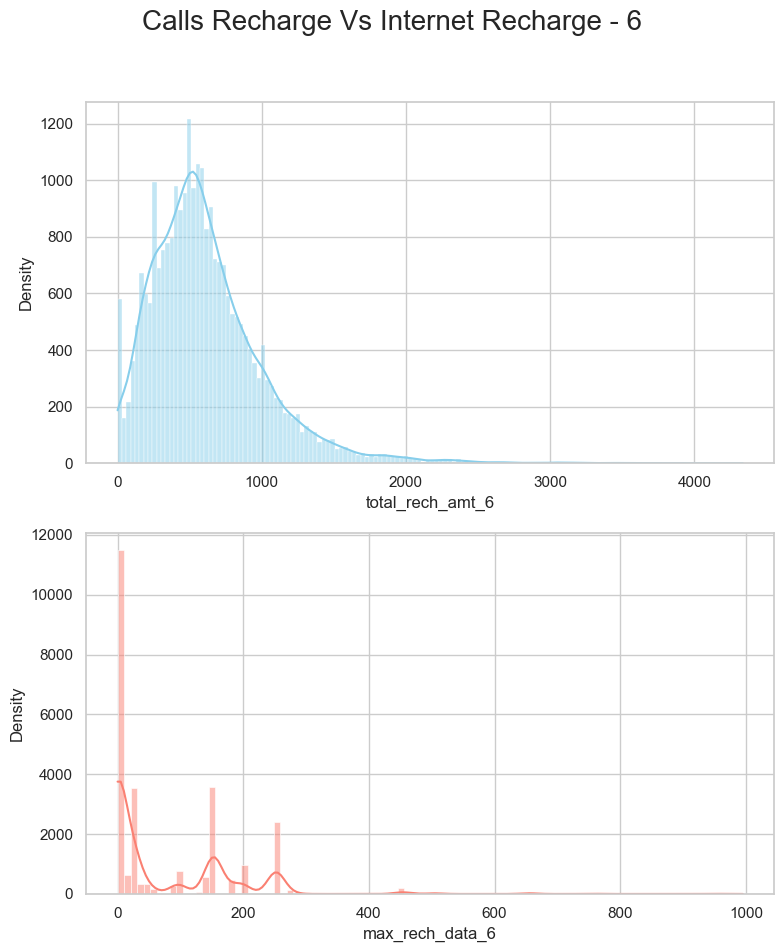

In [55]:
uni('total_rech_amt_6','max_rech_data_6',
    "Calls Recharge Vs Internet Recharge - 6")

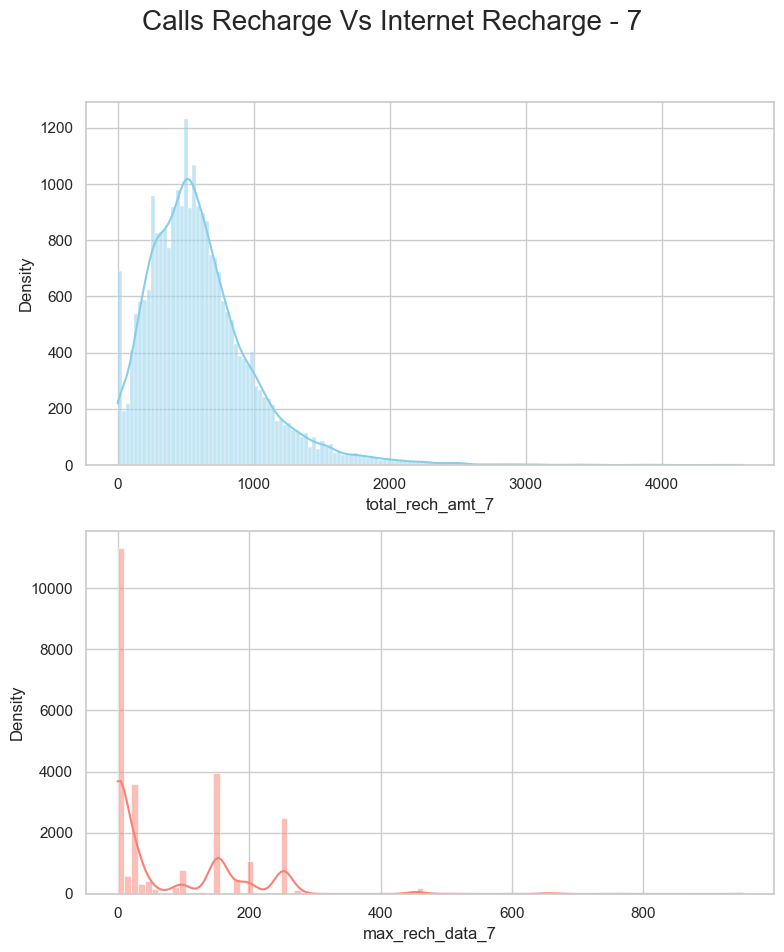

In [56]:
uni('total_rech_amt_7','max_rech_data_7',
    "Calls Recharge Vs Internet Recharge - 7")

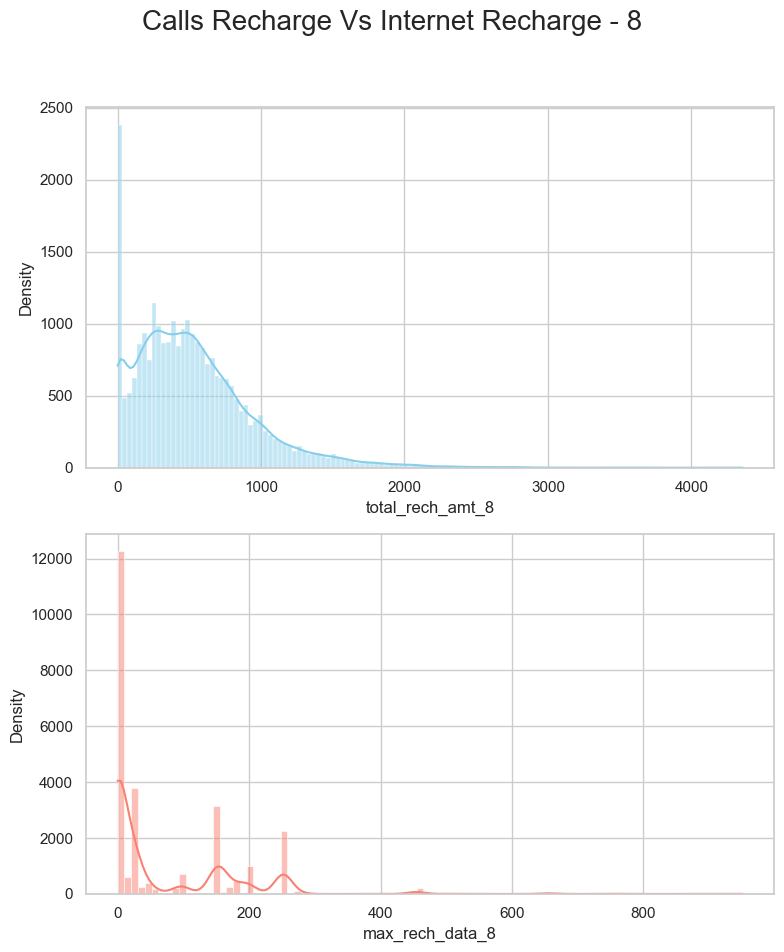

In [57]:
uni('total_rech_amt_8','max_rech_data_8',
    "Calls Recharge Vs Internet Recharge - 8")

Based on the observations presented above, we can deduce that the internet recharge amount remains relatively consistent across all months. However, upon closer examination of the recharge amount for calls, there is a noticeable and significant decrease in August compared to June and July. This sharp decline strongly suggests that the customer is likely to churn. Additionally, the data is skewed towards the left side.

### Number of times recharge

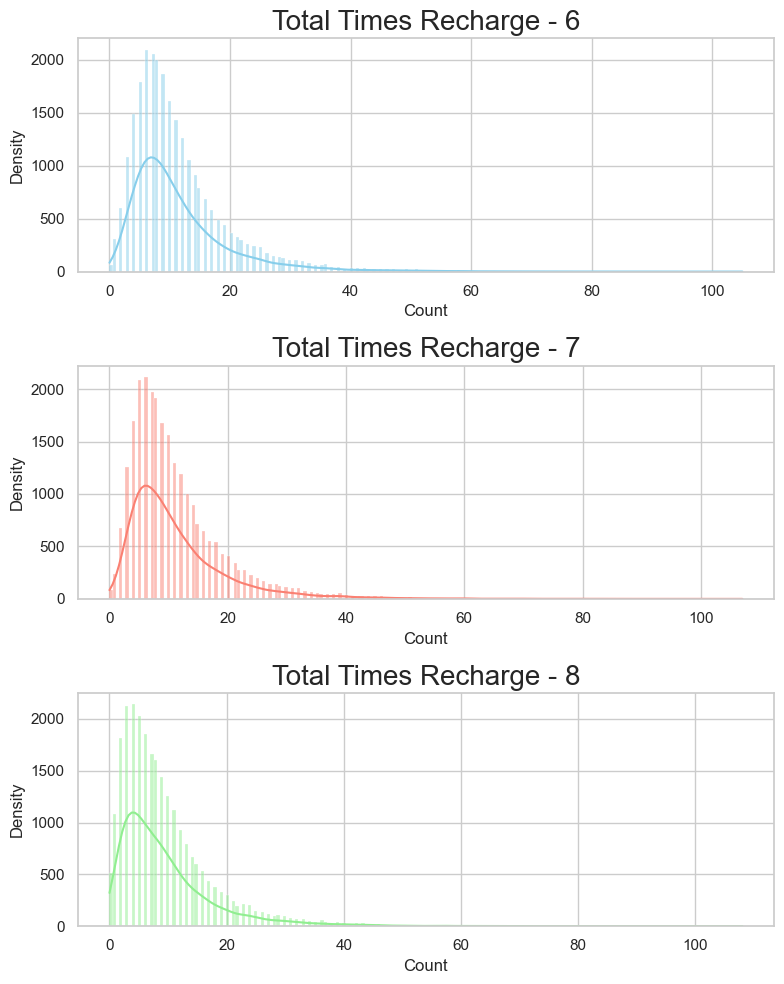

In [58]:
# Plotting side-by-side histograms 
plt.figure(figsize=(8, 10))
plt.subplot(3, 1, 1)
plt.title('Total Times Recharge - 6', fontdict={'size': 20})
sns.histplot(highvaldata['total_rech_num_6'], kde=True, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Density')
plt.subplot(3, 1, 2)
plt.title('Total Times Recharge - 7', fontdict={'size': 20})
sns.histplot(highvaldata['total_rech_num_7'], kde=True, color='salmon')
plt.xlabel('Count')
plt.ylabel('Density')
plt.subplot(3, 1, 3)
plt.title('Total Times Recharge - 8', fontdict={'size': 20})
sns.histplot(highvaldata['total_rech_num_8'], kde=True, color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


we can deduce that the data is strongly skewed to the left. We notice a significant increase in recharge counts during July (month 7). However, upon closer examination of the distribution, we observe a decrease in volumes for the month of August, while the density remains consistent. This pattern suggests a potential churn possibility in the upcoming months.

### Average recharge amount

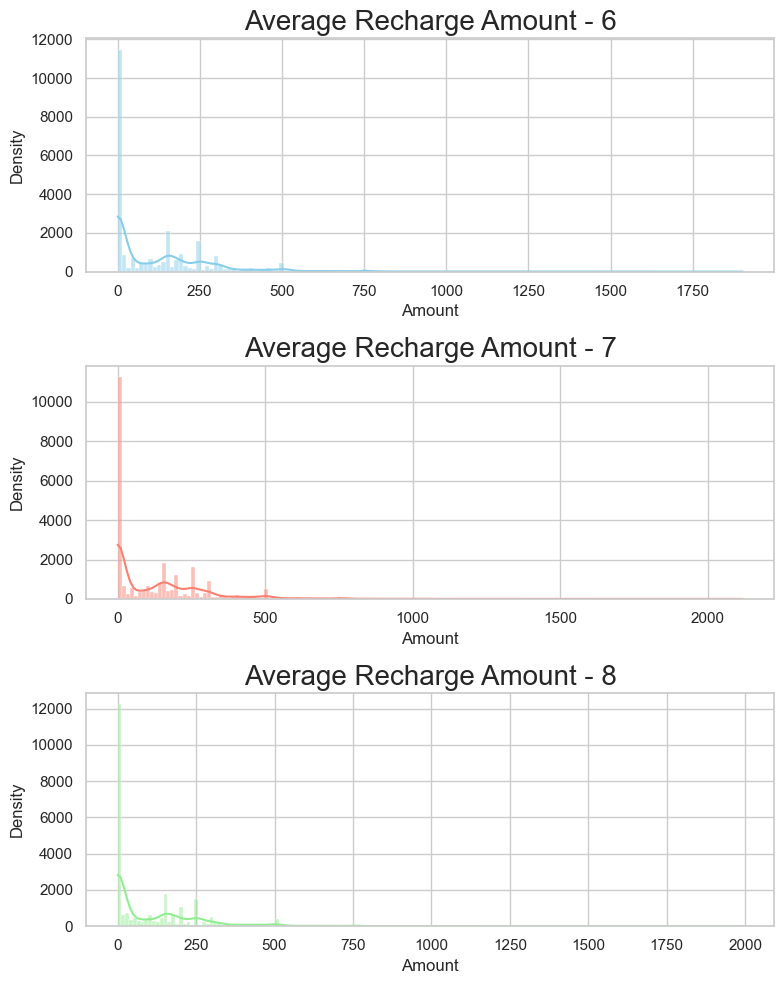

In [59]:
# Plotting side-by-side histograms 
plt.figure(figsize=(8, 10))
plt.subplot(3, 1, 1)
plt.title('Average Recharge Amount - 6', fontdict={'size': 20})
sns.histplot(highvaldata['av_rech_amt_data_6'], kde=True, color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.subplot(3, 1, 2)
plt.title('Average Recharge Amount - 7', fontdict={'size': 20})
sns.histplot(highvaldata['av_rech_amt_data_7'], kde=True, color='salmon')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.subplot(3, 1, 3)
plt.title('Average Recharge Amount - 8', fontdict={'size': 20})
sns.histplot(highvaldata['av_rech_amt_data_8'], kde=True, color='lightgreen')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


it's evident that July (7) experienced a slightly greater average recharge compared to the other months. However, the density of these recharge volumes appears to decrease in August (8), which could suggest a potential occurrence of churn.

### Tenurity of the customer with Existing Network provider

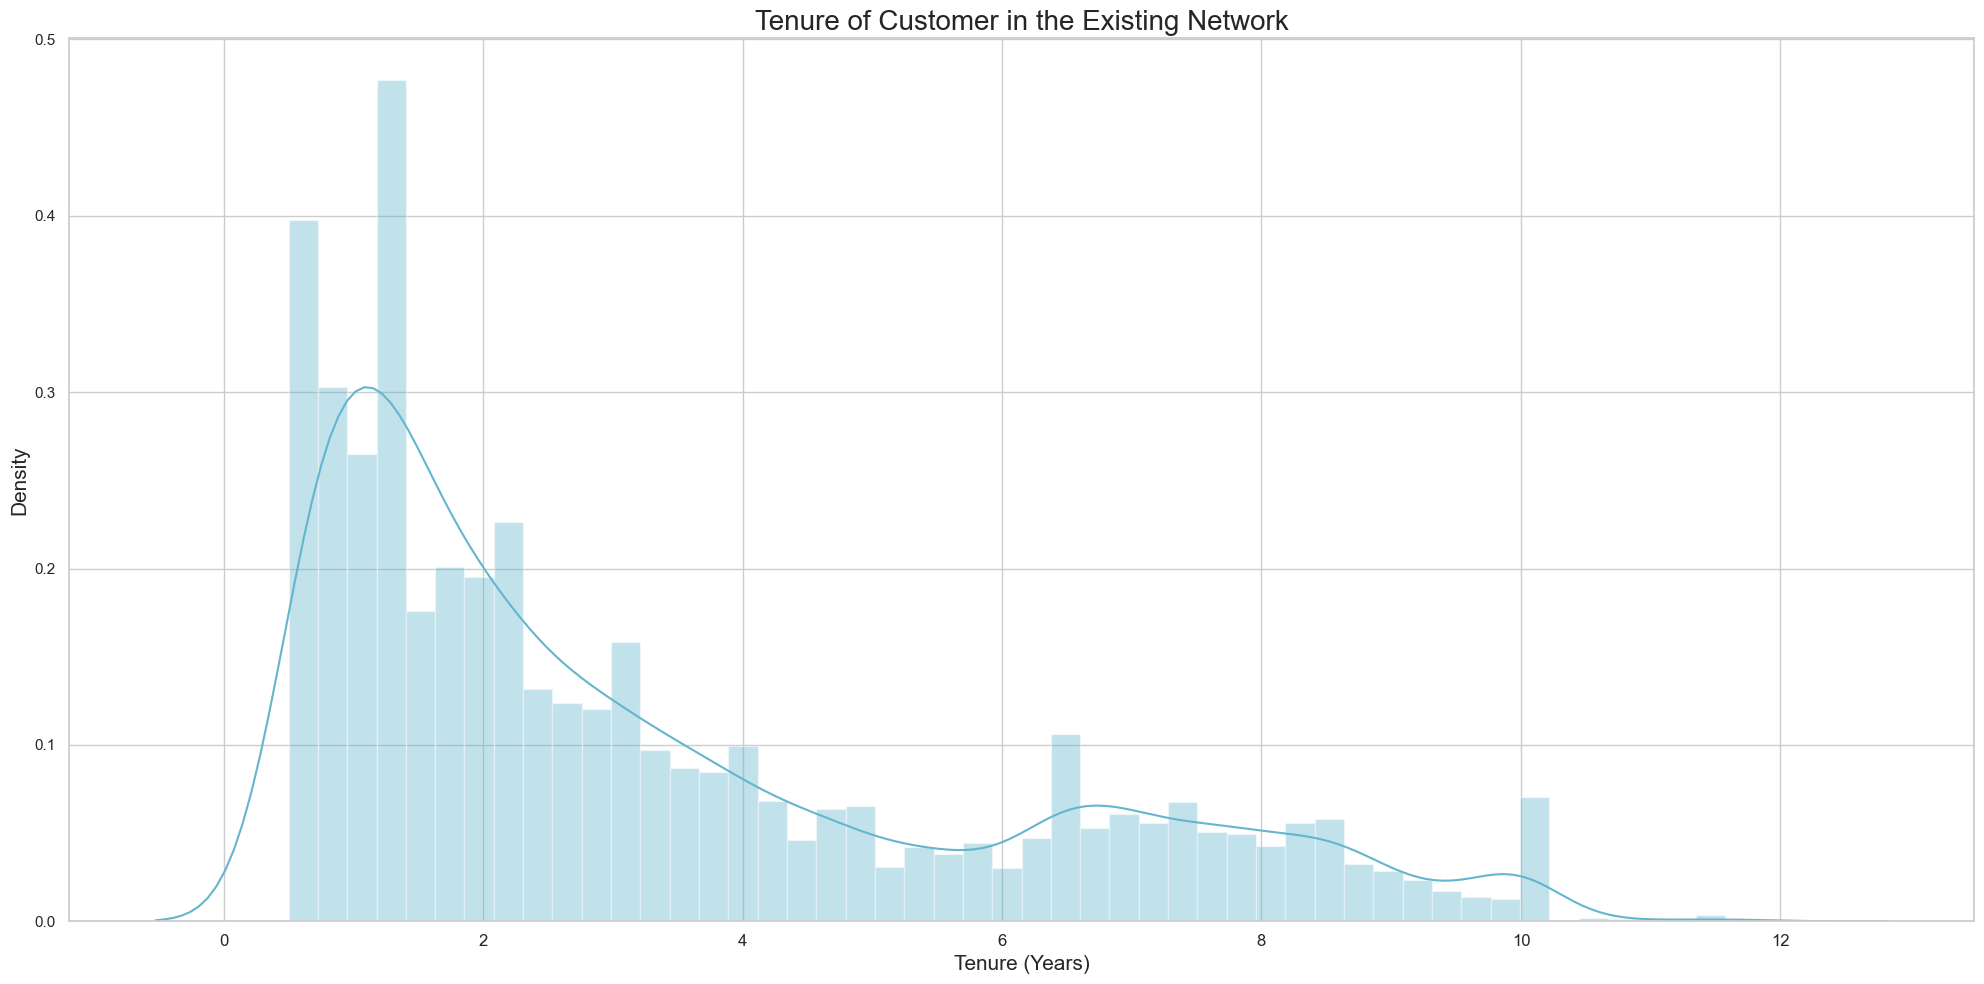

In [60]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.distplot(highvaldata['aon_Years'], color='c')
plt.title('Tenure of Customer in the Existing Network', fontdict={'size': 20})
plt.xlabel('Tenure (Years)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

it is evident that a significant portion of customers have been with the current telecom operator for a duration ranging from around 1 year to 3.5 years. This suggests that the telecom operator enjoys a reasonably steady customer base.

### Bivariate Analysis

In [61]:
def bivariate(colx, col6, col7, col8, title):
    plt.figure(figsize=[18, 6])
    plt.suptitle(title, fontsize=20)
    
    plt.subplot(1, 3, 1)
    gplot1 = sns.barplot(x=highvaldata[colx], y=highvaldata[col6], palette='viridis')
    for p in gplot1.patches:
        gplot1.annotate(round(p.get_height(), 2),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', size=12,
                        xytext=(0, 10),
                        textcoords='offset points')
    
    plt.subplot(1, 3, 2)
    gplot2 = sns.barplot(x=highvaldata[colx], y=highvaldata[col7], palette='plasma')
    for p in gplot2.patches:
        gplot2.annotate(round(p.get_height(), 2),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', size=12,
                        xytext=(0, 10),
                        textcoords='offset points')
    
    plt.subplot(1, 3, 3)
    gplot3 = sns.barplot(x=highvaldata[colx], y=highvaldata[col8], palette='magma')
    for p in gplot3.patches:
        gplot3.annotate(round(p.get_height(), 2),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', size=12,
                        xytext=(0, 10),
                        textcoords='offset points')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()


##  basis of Incoming Calls

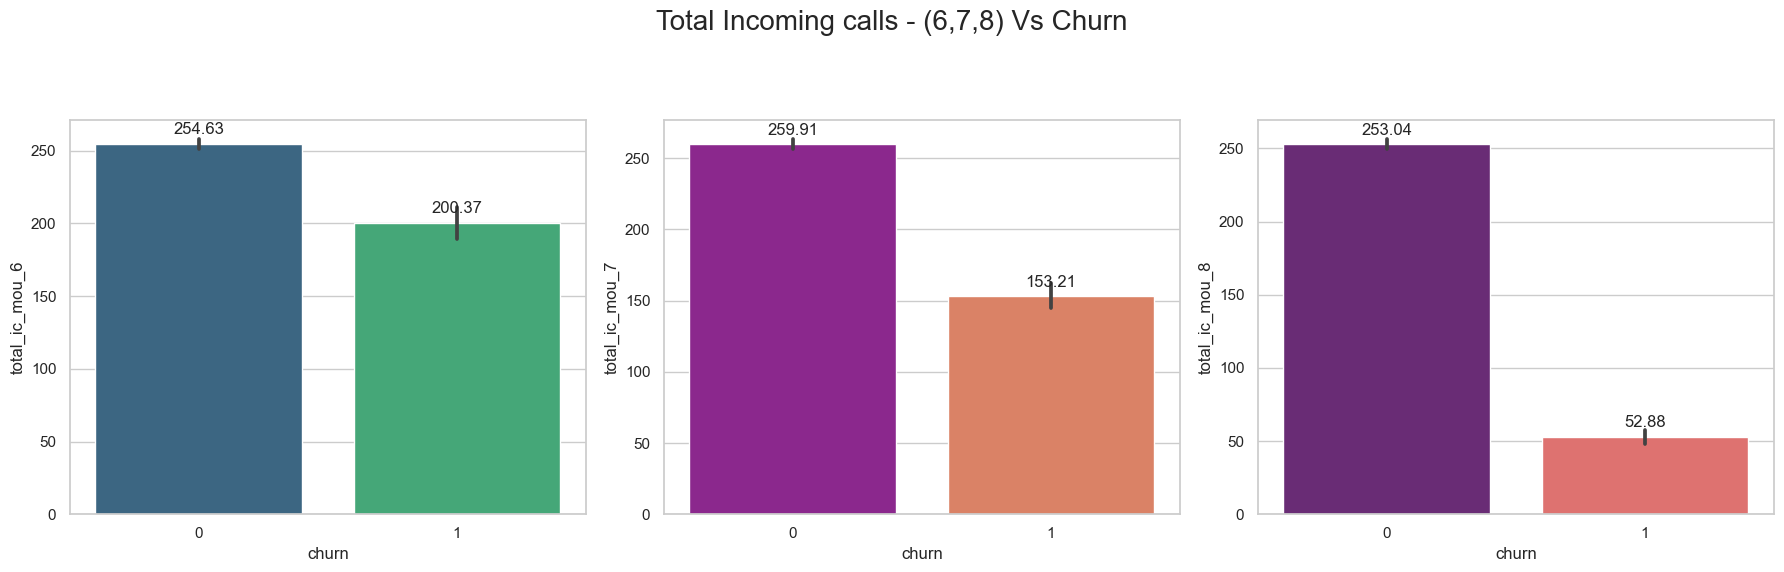

In [62]:
bivariate('churn', 'total_ic_mou_6','total_ic_mou_7',
          'total_ic_mou_8','Total Incoming calls - (6,7,8) Vs Churn')

we can notice a substantial decline in incoming call activity among customers likely to churn over time. In contrast, incoming call volumes remain stable for customers who are not likely to churn.

## Outgoing Calls

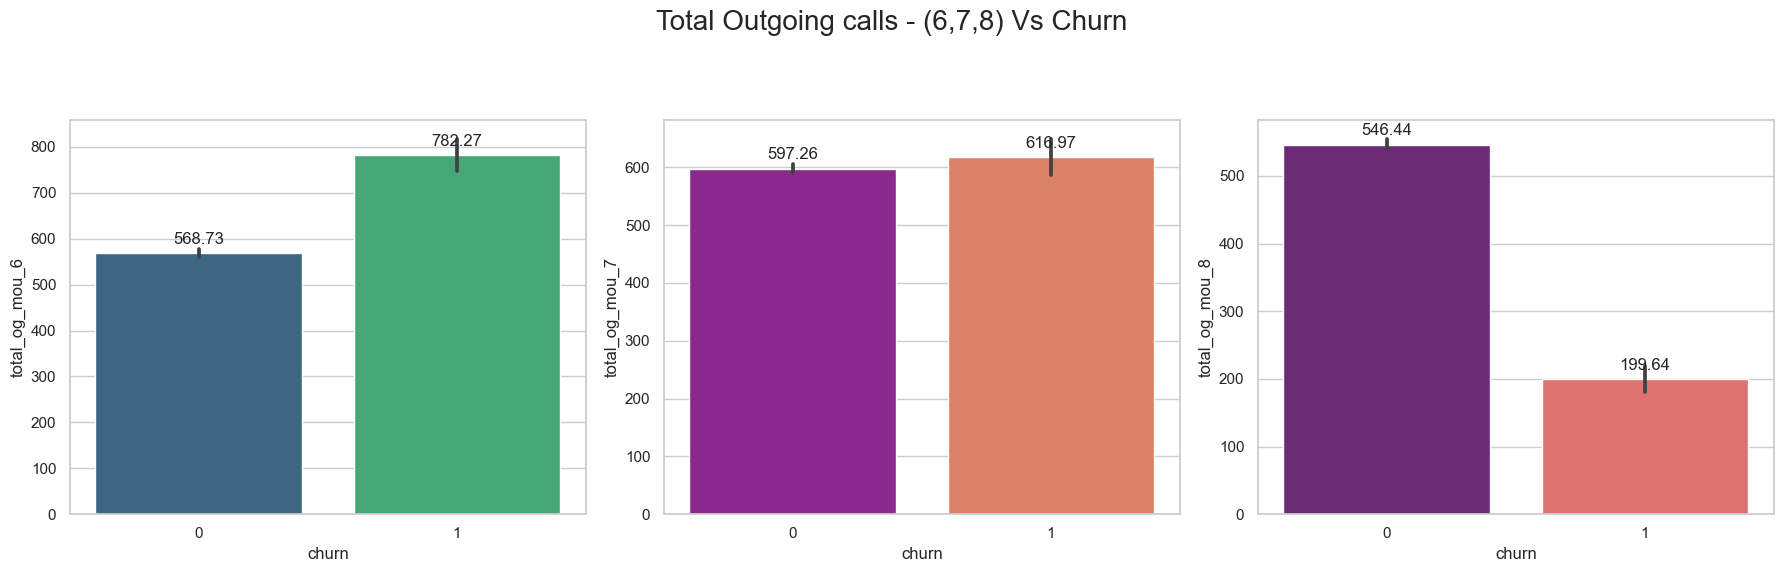

In [63]:
bivariate('churn', 'total_og_mou_6','total_og_mou_7',
          'total_og_mou_8','Total Outgoing calls - (6,7,8) Vs Churn')


it is evident that there is a notable decrease in outgoing call activity among customers likely to churn during the month of August (8). On the other hand, the outgoing call volumes for customers who are not likely to churn remain steady.

## Times Recharged

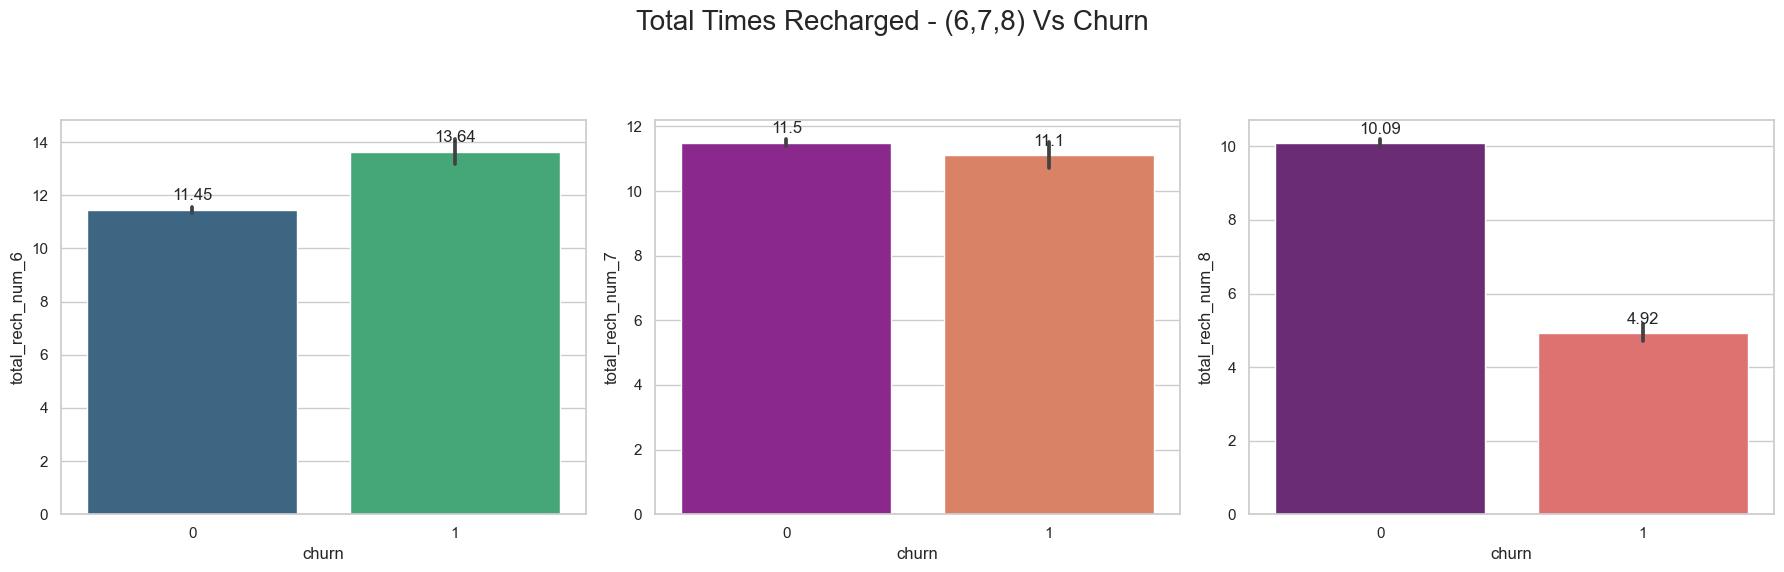

In [64]:
bivariate('churn', 'total_rech_num_6','total_rech_num_7',
          'total_rech_num_8','Total Times Recharged - (6,7,8) Vs Churn')

The total number of recharge instances has experienced a substantial reduction of around 46% during August (8) in comparison to months 6 and 7 for customers likely to churn.

## Recharge Calls  Amount

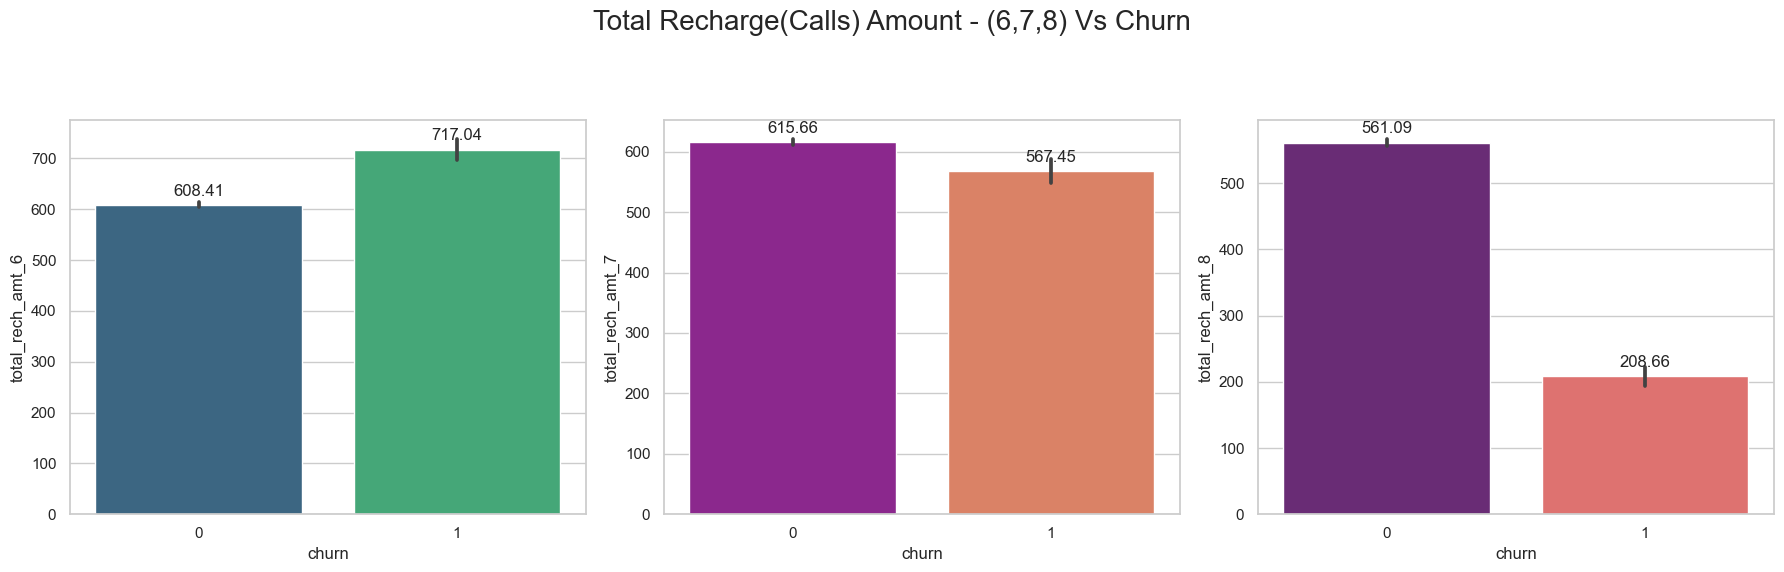

In [65]:
bivariate('churn', 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
          'Total Recharge(Calls) Amount - (6,7,8) Vs Churn')

The overall recharge amount specifically for calls has notably decreased by about 53% during August (8) when compared to months 6 and 7 among customers likely to churn

## Recharge Internet Amount

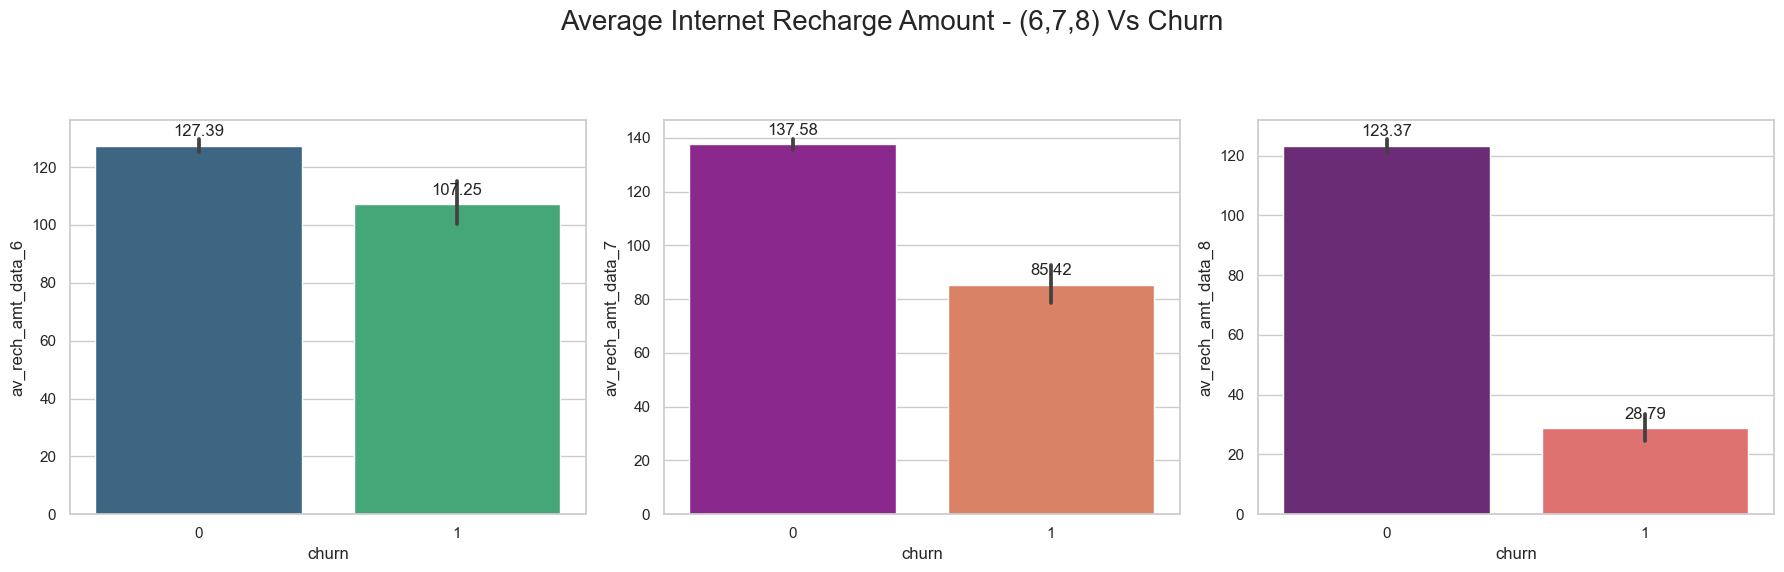

In [66]:
bivariate('churn', 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
          'Average Internet Recharge Amount - (6,7,8) Vs Churn')

The average amount of recharging for data (internet) has experienced a substantial decline of around 62% during August (8), in contrast to months 6 and 7, among customers likely to churn.

## Average Revenue Per User

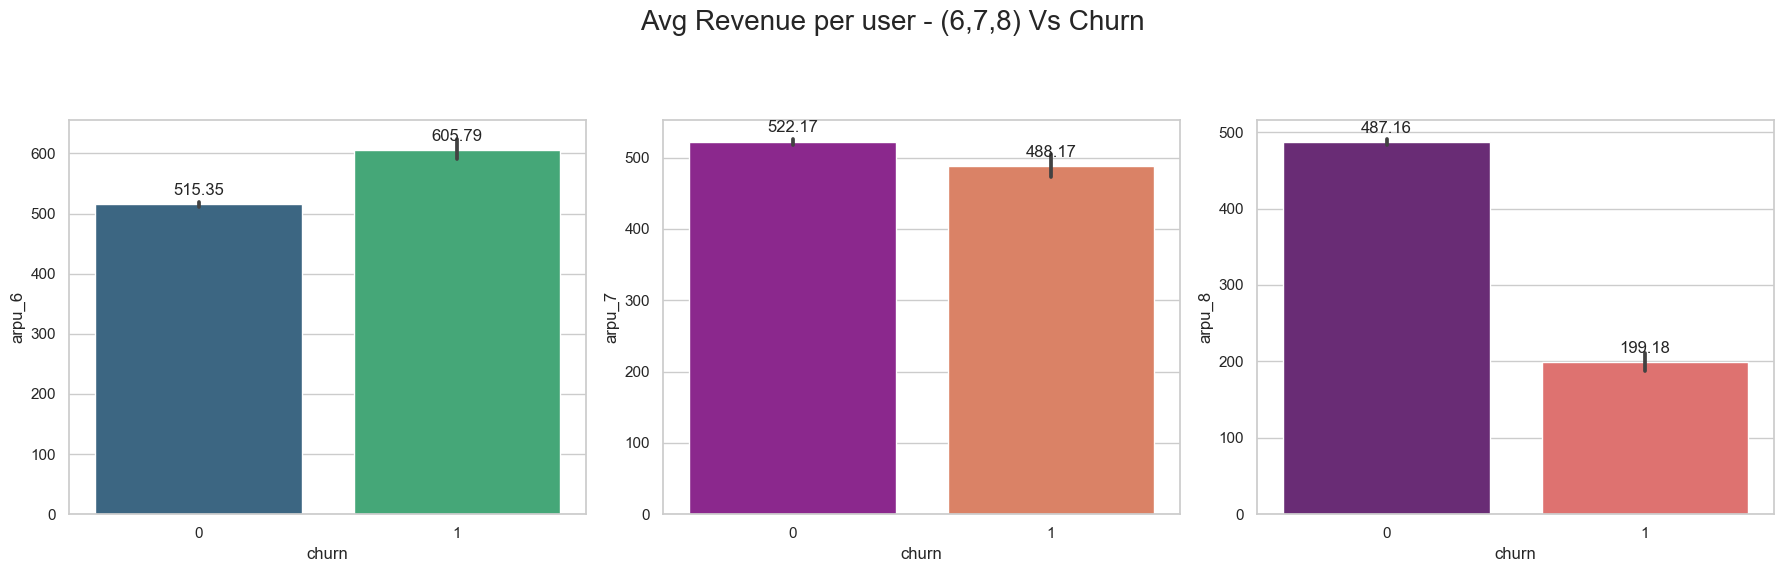

In [67]:
bivariate('churn', 'arpu_6','arpu_7','arpu_8',
          'Avg Revenue per user - (6,7,8) Vs Churn')

The average revenue generated per user among churners witnessed a decline of 48% during August (8). In contrast, the average revenue remained stable for non-churners.

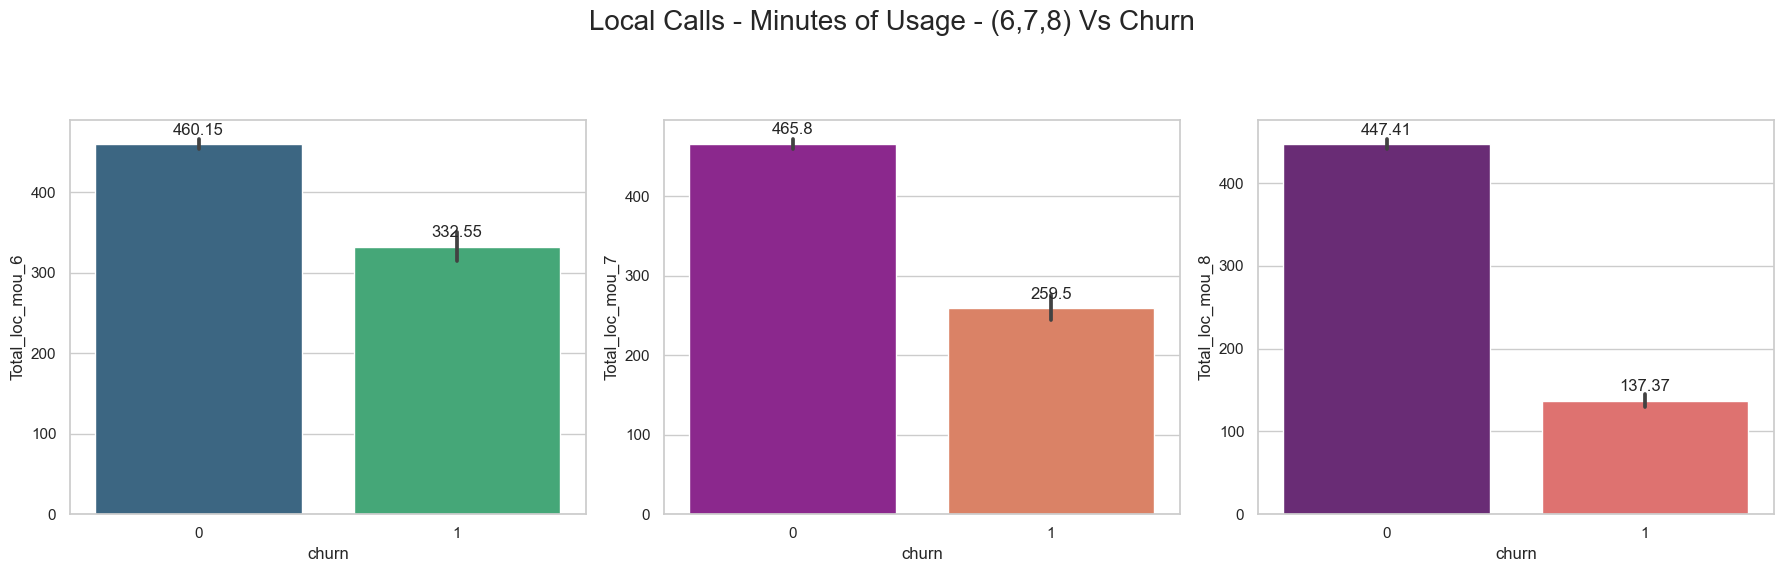

In [68]:
bivariate('churn', 'Total_loc_mou_6','Total_loc_mou_7','Total_loc_mou_8',
          'Local Calls - Minutes of Usage - (6,7,8) Vs Churn')

Local usage minutes remain steady among non-churners, while churners exhibit a continual decrease in usage over the three-month period.

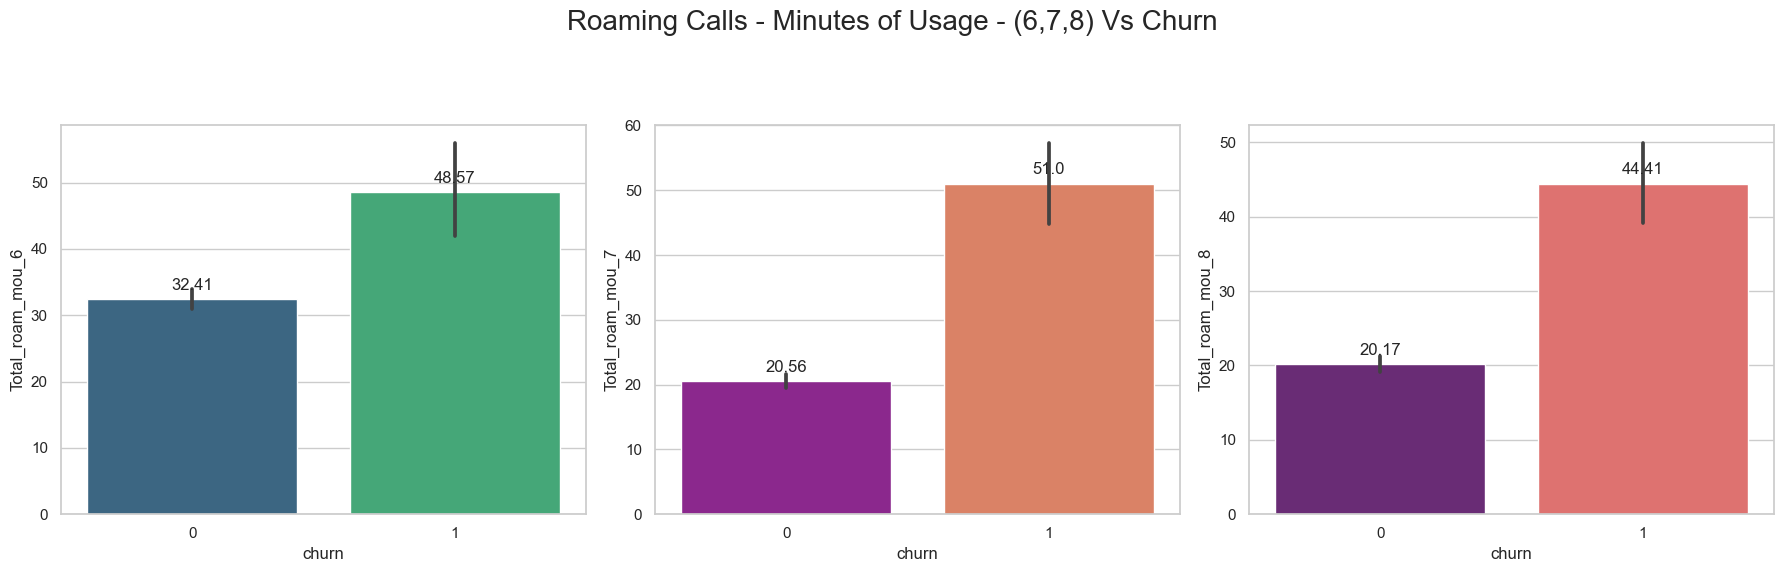

In [69]:
bivariate('churn', 'Total_roam_mou_6','Total_roam_mou_7','Total_roam_mou_8',
          'Roaming Calls - Minutes of Usage - (6,7,8) Vs Churn')

Roaming usage minutes among churners are consistently decreasing, while for non-churners, there has been a substantial drop of nearly 50%.

###  Customer Tenurity with Network provider

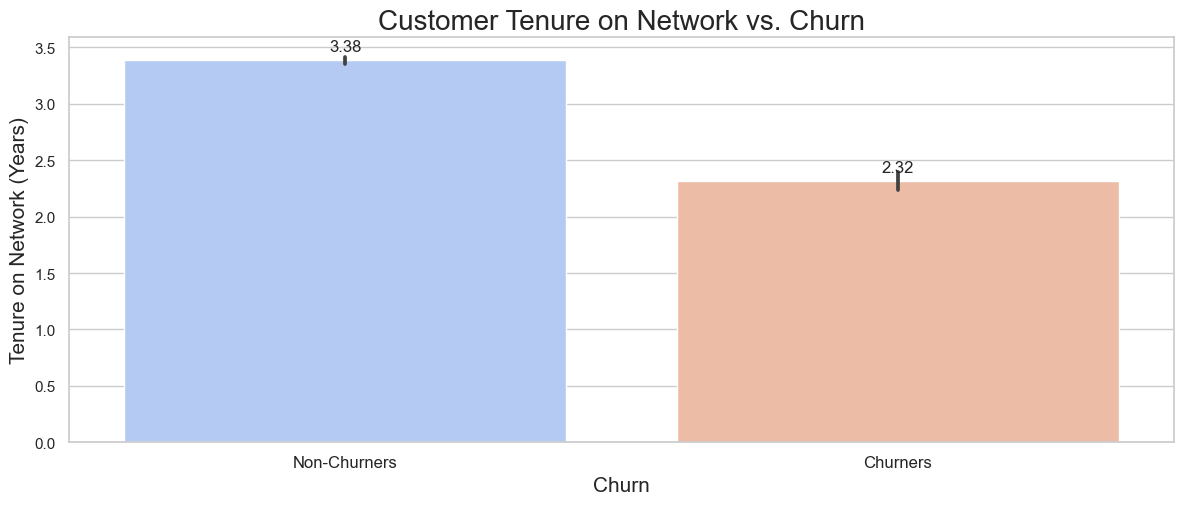

In [70]:
plt.figure(figsize=[12, 6])
plt.title('Customer Tenure on Network vs. Churn', fontsize=20)

gplot1 = sns.barplot(x=highvaldata['churn'], y=highvaldata['aon_Years'], palette='coolwarm')
for p in gplot1.patches:
    gplot1.annotate(round(p.get_height(), 2),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', size=12,
                    xytext=(0, 10),
                    textcoords='offset points')

plt.xlabel('Churn', fontsize=15)
plt.ylabel('Tenure on Network (Years)', fontsize=15)
plt.xticks([0, 1], ['Non-Churners', 'Churners'], fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()


We can deduce that customers who are likely to churn or leave have a shorter average tenure of approximately 2.3 years with the network provider. Conversely, non-churners are those who have maintained a longer relationship with the network provider, averaging around 3.3 years compared to the churners.

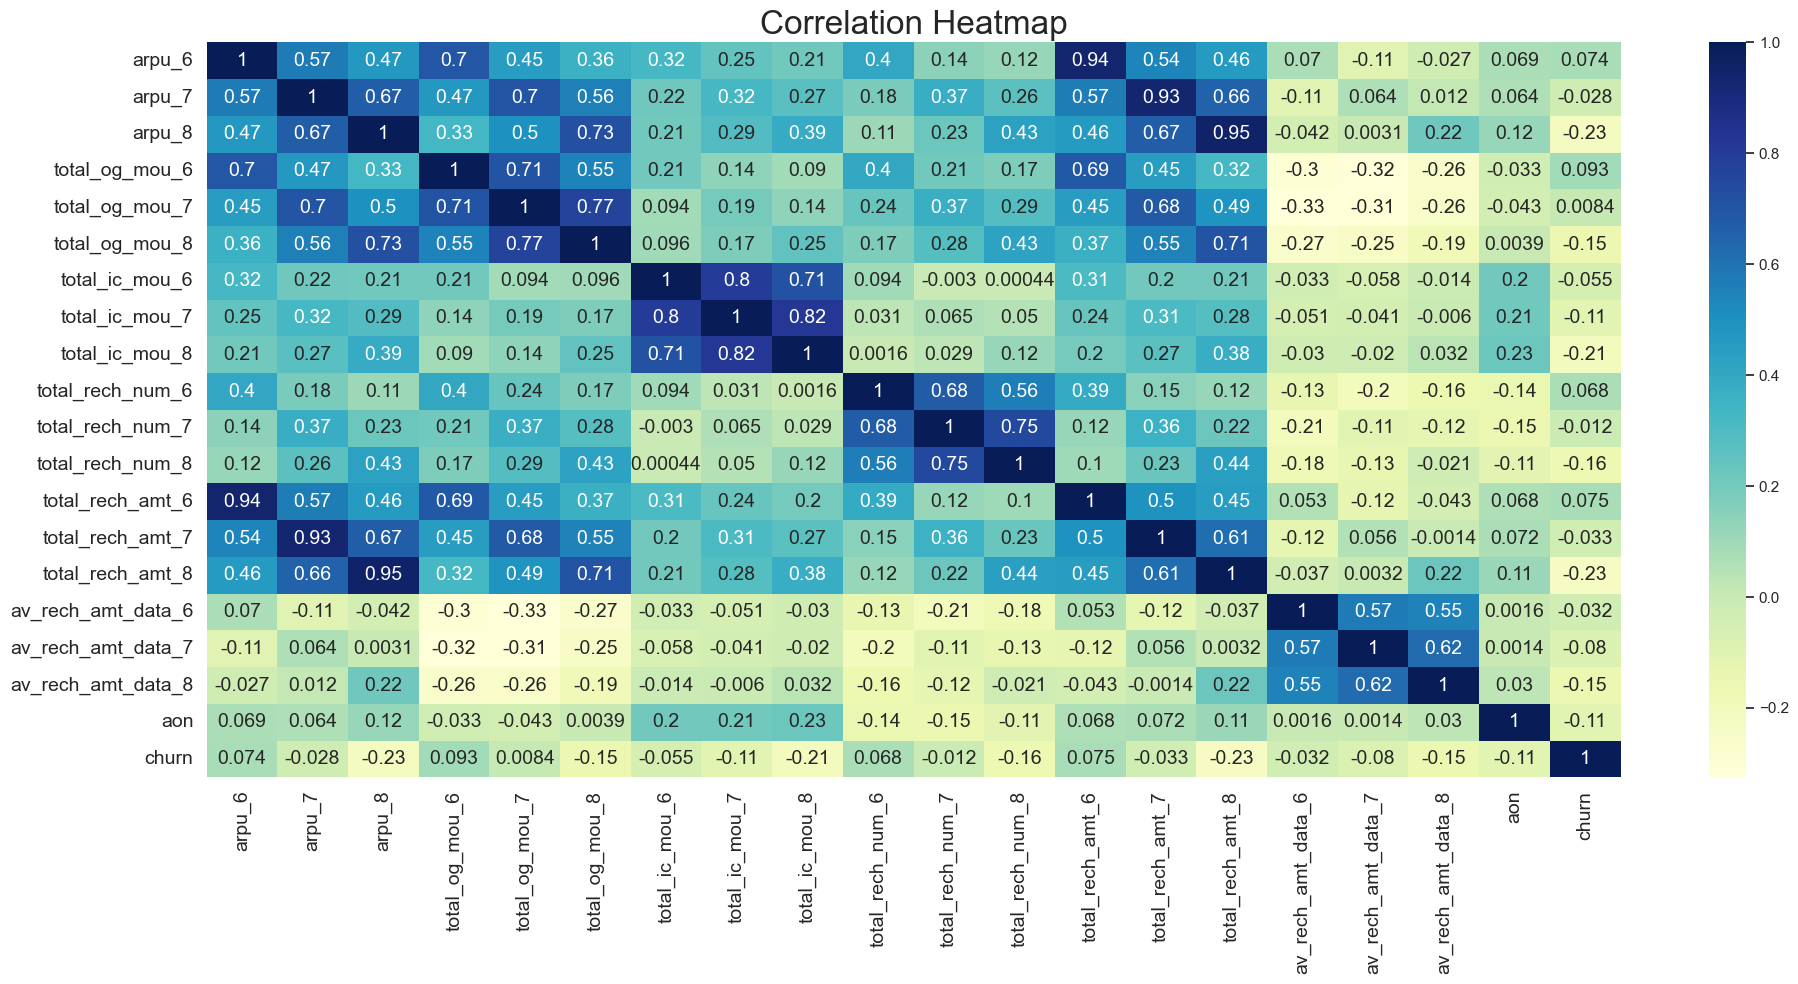

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette for the heatmap
sns.set_palette("coolwarm")

# Set up the figure and adjust the style
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

# Select relevant columns for the heatmap
columns_of_interest = ['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
                       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'aon', 'churn']

# Create a correlation heatmap
corr_matrix = highvaldata[columns_of_interest].corr(method='pearson')
plt.title('Correlation Heatmap', fontsize=24)
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, annot_kws={"size": 14}, cbar=True)

# Set x-axis and y-axis tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [72]:
highvaldata.shape

(26015, 197)

## Model Building

### Splitting into train and test

In [73]:
#Splitting dataset into train and test
df_train, df_test = train_test_split(highvaldata, random_state=100, stratify=highvaldata['churn'])

In [74]:
#Instantiating MinMaxScaler
scaler = MinMaxScaler()

In [75]:
#List of all the numeric columns
num_vars = list(highvaldata.columns)
num_vars.remove('churn')

In [76]:
#Fit transforming all the numeric columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [77]:
#Splitting df_train into x_train and y_train
y_train = df_train.pop('churn')
x_train = df_train

In [78]:
under_sample = RandomUnderSampler(random_state=100)
x_resampled, y_resampled = under_sample.fit_resample(x_train, y_train)

In [79]:
print(len(x_resampled), len(y_resampled))

3236 3236


In [80]:
#LogisticRegression model
logreg = LogisticRegression(random_state=42)

In [81]:
#Choosing optimum number of features using RFECV
rfecv = RFECV(estimator = logreg, cv=4)

rfecv = rfecv.fit(x_resampled, y_resampled)

In [82]:
#Printing number of potimum features
rfecv.n_features_

38

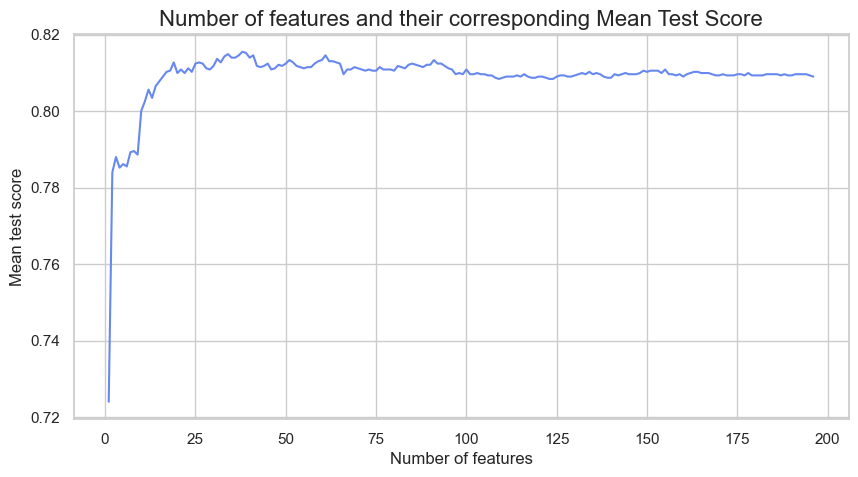

In [83]:
#Graph representing the number of features and the corresponding mean test score.
plt.figure(figsize=[10,5])
plt.plot(range(1, x_resampled.shape[1] + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel('Number of features')
plt.ylabel('Mean test score')
plt.title('Number of features and their corresponding Mean Test Score', fontsize=16)
plt.show()

In [84]:
#Using RFE to select the best 15 variables
rfe = RFE(logreg, n_features_to_select=15)

In [85]:
#Fitting the RFE model
rfe = rfe.fit(x_resampled, y_resampled)

In [86]:
#All the columns with their rankings
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 182),
 ('std_og_t2o_mou', False, 181),
 ('loc_ic_t2o_mou', False, 180),
 ('arpu_6', False, 42),
 ('arpu_7', False, 26),
 ('arpu_8', False, 68),
 ('onnet_mou_6', False, 144),
 ('onnet_mou_7', False, 77),
 ('onnet_mou_8', False, 63),
 ('offnet_mou_6', False, 113),
 ('offnet_mou_7', False, 76),
 ('offnet_mou_8', False, 162),
 ('roam_ic_mou_6', False, 133),
 ('roam_ic_mou_7', False, 69),
 ('roam_ic_mou_8', False, 103),
 ('roam_og_mou_6', False, 135),
 ('roam_og_mou_7', False, 59),
 ('roam_og_mou_8', False, 18),
 ('loc_og_t2t_mou_6', False, 75),
 ('loc_og_t2t_mou_7', False, 132),
 ('loc_og_t2t_mou_8', False, 43),
 ('loc_og_t2m_mou_6', False, 118),
 ('loc_og_t2m_mou_7', False, 37),
 ('loc_og_t2m_mou_8', False, 55),
 ('loc_og_t2f_mou_6', False, 159),
 ('loc_og_t2f_mou_7', False, 96),
 ('loc_og_t2f_mou_8', False, 128),
 ('loc_og_t2c_mou_6', False, 41),
 ('loc_og_t2c_mou_7', False, 72),
 ('loc_og_t2c_mou_8', False, 143),
 ('loc_og_mou_6', False, 89),
 ('loc_og_mou_7',

In [87]:
#Best 15 selected variables by the RFE model
col = x_resampled.columns[rfe.support_]
col

Index(['total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'Total_loc_mou_8', 'arpu_diff',
       'total_og_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_data_diff'],
      dtype='object')

In [88]:
# Defining a function which returns the vif values of the columns
def getvif(cols):
    vif = pd.DataFrame()
    vif['Features'] = x_resampled[col].columns
    vif['VIF'] = [variance_inflation_factor(x_resampled[col].values, i) for i in range(x_resampled[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
   # vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif.sort_values(by='VIF',ascending=False))

In [89]:
#Logistic Regression Model 1
x_resampled_sm = sm.add_constant(x_resampled[col])
logm1 = sm.GLM(y_resampled, x_resampled_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3220
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.4
Date:                Tue, 08 Aug 2023   Deviance:                       2836.9
Time:                        23:27:22   Pearson chi2:                 1.22e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.1844    

In [90]:
#Dropping 'arpu_diff'
col = col.drop('arpu_diff')
col

Index(['total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'Total_loc_mou_8', 'total_og_mou_diff',
       'total_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff',
       'max_rech_data_diff'],
      dtype='object')

In [91]:
#Logistic Regression Model 2
x_resampled_sm = sm.add_constant(x_resampled[col])
logm2 = sm.GLM(y_resampled, x_resampled_sm, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3221
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1419.1
Date:                Tue, 08 Aug 2023   Deviance:                       2838.2
Time:                        23:27:22   Pearson chi2:                 1.23e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3052    

In [92]:
#Drop 'total_ic_mou_diff'
col = col.drop('total_ic_mou_diff')
col

Index(['total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'Total_loc_mou_8', 'total_og_mou_diff',
       'total_rech_num_diff', 'total_rech_amt_diff', 'max_rech_data_diff'],
      dtype='object')

In [93]:
#Logistic Regression Model 3
x_resampled_sm = sm.add_constant(x_resampled[col])
logm3 = sm.GLM(y_resampled, x_resampled_sm, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3222
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.5
Date:                Tue, 08 Aug 2023   Deviance:                       2873.1
Time:                        23:27:22   Pearson chi2:                 9.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.7001    

In [94]:
#Dropping 'total_rech_num_diff'
col = col.drop('total_rech_num_diff')
col

Index(['total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'Total_loc_mou_8', 'total_og_mou_diff',
       'total_rech_amt_diff', 'max_rech_data_diff'],
      dtype='object')

In [95]:
#Logistic Regression Model 4
x_resampled_sm = sm.add_constant(x_resampled[col])
logm4 = sm.GLM(y_resampled, x_resampled_sm, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3223
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.3
Date:                Tue, 08 Aug 2023   Deviance:                       2884.6
Time:                        23:27:22   Pearson chi2:                 9.06e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.7868    

In [96]:
#Dropping 'total_og_mou_diff'
col = col.drop('total_og_mou_diff')
col

Index(['total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'Total_loc_mou_8', 'total_rech_amt_diff',
       'max_rech_data_diff'],
      dtype='object')

In [97]:
#Logistic Regression Model 5
x_resampled_sm = sm.add_constant(x_resampled[col])
logm5 = sm.GLM(y_resampled, x_resampled_sm, family = sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3224
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1457.9
Date:                Tue, 08 Aug 2023   Deviance:                       2915.9
Time:                        23:27:22   Pearson chi2:                 9.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.2670    

In [98]:
#Dropping 'total_rech_amt_diff'
col = col.drop('total_rech_amt_diff')
col

Index(['total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'Total_loc_mou_8', 'max_rech_data_diff'],
      dtype='object')

In [99]:
#Logistic Regression Model 6
x_resampled_sm = sm.add_constant(x_resampled[col])
logm6 = sm.GLM(y_resampled, x_resampled_sm, family = sm.families.Binomial())
res6 = logm6.fit()
print(res6.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3225
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1498.6
Date:                Tue, 08 Aug 2023   Deviance:                       2997.2
Time:                        23:27:22   Pearson chi2:                 7.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3688
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9644      0

In [100]:
#Dropping 'Total_loc_mou_8'
col = col.drop('Total_loc_mou_8')
col

Index(['total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'max_rech_data_diff'],
      dtype='object')

In [101]:
#Logistic Regression Model 7
x_resampled_sm = sm.add_constant(x_resampled[col])
logm7 = sm.GLM(y_resampled, x_resampled_sm, family = sm.families.Binomial())
res7 = logm7.fit()
print(res7.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3226
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1499.6
Date:                Tue, 08 Aug 2023   Deviance:                       2999.1
Time:                        23:27:22   Pearson chi2:                 7.95e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3684
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9161      0

In [102]:
#Dropping col 'max_rech_data_diff' due to high p value
col = col.drop('max_rech_data_diff')

In [103]:
#Logistic Regression Model 8
x_resampled_sm = sm.add_constant(x_resampled[col])
logm8 = sm.GLM(y_resampled, x_resampled_sm, family = sm.families.Binomial())
res8 = logm8.fit()
print(res8.summary())
getvif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3227
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.3
Date:                Tue, 08 Aug 2023   Deviance:                       3002.6
Time:                        23:27:23   Pearson chi2:                 8.30e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8714      0

In [104]:
#Getting predicted values on train set
y_train_pred = res8.predict(x_resampled_sm)
y_train_pred[:10]

0    0.178973
1    0.309613
2    0.843902
3    0.018778
4    0.301282
5    0.054319
6    0.602637
7    0.358378
8    0.083366
9    0.050103
dtype: float64

In [105]:
#Reshaping y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17897314, 0.30961339, 0.84390211, 0.01877771, 0.30128216,
       0.0543194 , 0.60263655, 0.35837821, 0.08336551, 0.05010332])

In [106]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn': y_resampled.values, 
                                  'Churn_prob' : y_train_pred})
y_train_pred_final.head()

,Churn,Churn_prob
0,0,0.178973
1,0,0.309613
2,0,0.843902
3,0,0.018778
4,0,0.301282


In [107]:
#Setting the cutoff probability to 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [108]:
y_train_pred_final

,Churn,Churn_prob,predicted
0,0,0.178973,0
1,0,0.309613,0
2,0,0.843902,1
3,0,0.018778,0
4,0,0.301282,0
...,...,...,...
3231,1,0.796534,1
3232,1,0.762537,1
3233,1,0.761922,1
3234,1,0.851805,1


In [109]:
#Getting the value counts of y_train_pred_final
y_train_pred_final.predicted.value_counts()

1    1754
0    1482
Name: predicted, dtype: int64

In [110]:
#Creating a confusion matrix
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [111]:
#Printing the confusion matrix
confusion

array([[1209,  409],
       [ 273, 1345]], dtype=int64)

In [112]:
#Checking accuracy of the model
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7892459826946848


In [113]:
#Defining True Positive. True Negative, False Positive, False Negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [114]:
# Sensitivity of the training set
sensi = TP / float(TP + FN)
sensi

0.8312731767614339

In [115]:
# specificity of the training set
speci = TN / float(TN + FP)
speci

0.7472187886279357

In [116]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.2527812113720643


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7668187001140251


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8157894736842105


In [119]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7668187001140251

In [120]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8312731767614339

In [121]:
#Defining a ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

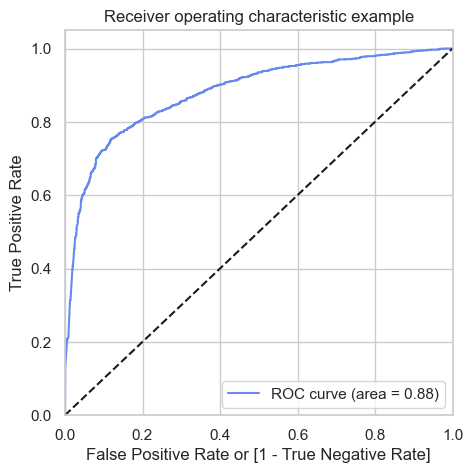

In [122]:
#ROC Curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.178973,0,1,1,0,0,0,0,0,0,0,0
1,0,0.309613,0,1,1,1,1,0,0,0,0,0,0
2,0,0.843902,1,1,1,1,1,1,1,1,1,1,0
3,0,0.018778,0,1,0,0,0,0,0,0,0,0,0
4,0,0.301282,0,1,1,1,1,0,0,0,0,0,0


In [124]:
#Printing various probabilty rate and its corresponding metrics score
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.637515  0.962917  0.312114
0.2   0.2  0.706737  0.942522  0.470952
0.3   0.3  0.739493  0.911619  0.567367
0.4   0.4  0.768232  0.871446  0.665019
0.5   0.5  0.789246  0.831273  0.747219
0.6   0.6  0.809642  0.779975  0.839308
0.7   0.7  0.810260  0.704574  0.915946
0.8   0.8  0.752163  0.538319  0.966007
0.9   0.9  0.500000  0.000000  1.000000


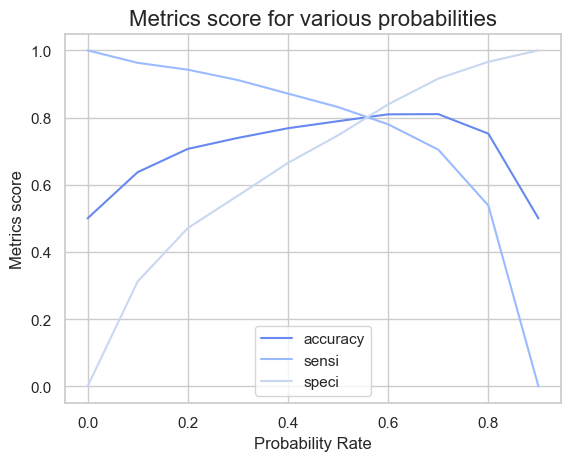

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Metrics score for various probabilities', size=16)
plt.xlabel('Probability Rate')
plt.ylabel('Metrics score')
plt.show()

In [126]:
#Setting the cutoff threshold as 0.55
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.178973,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.309613,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.843902,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.018778,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.301282,0,1,1,1,1,0,0,0,0,0,0,0


In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8034610630407911

In [128]:
#Creating a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[1293,  325],
       [ 311, 1307]], dtype=int64)

In [129]:
#Defining True Positive. True Negative, False Positive, False Negative
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.80778739184178

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.7991347342398022

In [132]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.20086526576019778


In [133]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8008578431372549


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8061097256857855


In [135]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8008578431372549

In [136]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.80778739184178

- inference: different values of accuracy, sensitivity and specifity are calculated at different probablities. All these when plotted are merged at one point i.e 0.5. We have already opted this cutoff point for prediction.

### Prediction on Test set

In [137]:
#Fitting numeric columns on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_t2c_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_t2o_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,Total_loc_mou_diff,Total_roam_mou_diff
9476,0.0,0.0,0.0,0.204214,0.222814,0.117563,0.002632,0.006331,0.010151,0.030655,0.019512,0.025146,0.0,0.0,0.0,0.000000,0.0,0.0,0.005533,0.011933,0.024217,0.055211,0.034039,0.039183,0.056763,0.036529,0.090452,0.000000,0.000000,0.000000,0.054200,0.037545,0.050501,0.000000,0.000000,0.000238,0.000000,0.000000,0.000283,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000492,0.0,0.0,0.0,0.000000,0.000000,0.001890,0.00000,0.0,0.0,0.026183,0.021041,0.032245,0.004846,0.013170,0.013203,0.020264,0.017659,0.022198,0.015121,0.007828,0.016769,0.020867,0.021667,0.027468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.020838,0.019926,0.023778,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.038095,0.028037,0.044444,0.081200,0.059891,0.094998,0.072381,0.073333,0.097468,0.000000,0.000000,0.118397,0.076923,0.041667,0.034483,0.159832,0.161935,0.161935,0.159832,0.072710,0.07

In [138]:
#Getting a description of the numeric columns
df_test.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_t2c_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_t2o_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,Total_loc_mou_diff,Total_roam_mou_diff
count,6504.0,6504.0,6504.0,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.0,6504.0,6504.0,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.0,6504.0,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.0,6504.0,6504

In [139]:
#y_test to contain only target variable
y_test = df_test.pop('churn')

#X_train to contain all the remaining variable other than Target
x_test = df_test
x_test = x_test[col]

In [140]:
x_test.head()

,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g
9476,0.023778,0.0,0.044444,0.118397,0.034483,0.021182,0.2,0.096905
29563,0.090347,0.0,0.066667,0.045537,0.068966,0.007877,0.0,0.002279
19542,0.042058,0.0,0.011111,0.227687,0.000000,0.000000,0.0,0.001687
14505,0.078780,0.0,0.133333,0.136612,0.000000,0.000000,0.0,0.000000
26258,0.000000,0.0,0.011111,0.000000,0.000000,0.000000,0.0,0.000000


In [141]:
# Add a constant
x_test_sm = sm.add_constant(x_test)

# Getting the predicted values on the test set
y_test_pred = res8.predict(x_test_sm)
y_test_pred[:10]

9476     0.223911
29563    0.291863
19542    0.506504
14505    0.282183
26258    0.859374
8800     0.422976
19858    0.340404
25460    0.479272
9139     0.385708
20035    0.859374
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.rename(columns = {0 : 'churn_rate'}, inplace=True)
y_pred_1.head()

,churn_rate
9476,0.223911
29563,0.291863
19542,0.506504
14505,0.282183
26258,0.859374


In [143]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
9476,0
29563,0
19542,0
14505,0
26258,0


In [144]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,churn,churn_rate
9476,0,0.223911
29563,0,0.291863
19542,0,0.506504
14505,0,0.282183
26258,0,0.859374


In [145]:
#Setting the cutoff threshold to 0.55
y_pred_final['final_predicted'] = y_pred_final['churn_rate'].map(lambda x: 1 if x > 0.55 else 0)

In [146]:
#Getting the index of the dataframe
y_pred_final['ID'] = y_pred_final.index

In [147]:
y_pred_final.head()

,churn,churn_rate,final_predicted,ID
9476,0,0.223911,0,9476
29563,0,0.291863,0,29563
19542,0,0.506504,0,19542
14505,0,0.282183,0,14505
26258,0,0.859374,1,26258


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.808579335793358

In [149]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)
print(confusion2)

[[4824 1141]
 [ 104  435]]


In [150]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [151]:
# Sensitivity of the test set
TP / float(TP + FN)

0.8070500927643784

In [152]:
# specificity of the test set
TN / float(TN + FP)

0.8087175188600167

In [153]:
# Precision for the test set
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.2760152284263959

In [154]:
# Recall for the test set
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8070500927643784

# Conclusion

All the metrics of Train and Test data seem to be matching except for precision. We can conclude that the model is a decent fit for predicting the churn.
    
- Following are the Train Data metrics: 
    - accuracy - 80%
    - sensitivity - 81%
    - Specificity - 80%
    - Precision - 80%
    - Recall - 81%

    <br>
    
- Following are the Test Data metrics: 
    - accuracy - 80%
    - sensitivity - 81%
    - specificity - 81%
    - precision - 28%
    - Recall - 81%
    

## Model building with Decision Tree and  Random forest ##


In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [162]:
df_train_rf, df_test_rf = train_test_split(highvaldata, random_state=100, stratify=highvaldata['churn'])

In [163]:
#Splitting df_train and df_test into x_train and y_train and x_test and y_test
y_train_rf = df_train_rf.pop('churn')
x_train_rf = df_train_rf

y_test_rf = df_test_rf.pop('churn')
x_test_rf = df_test_rf

In [164]:
def get_metrics(y_train_rf,y_train_pred_rf,y_test,y_pred_rf):
    
    print("Train Accuracy :", accuracy_score(y_train_rf, y_train_pred_rf))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_rf, y_train_pred_rf))
    print ('F1 Train score: ', f1_score(y_train_rf, y_train_pred_rf))
    print ('Train Recall: ', recall_score(y_train_rf, y_train_pred_rf))
    print ('Train Precision: ', precision_score(y_train_rf, y_train_pred_rf))
    print ('\n clasification report:\n', classification_report(y_train_rf,y_train_pred_rf))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, y_pred_rf))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_rf))
    print ('Test F1 score: ', f1_score(y_test, y_pred_rf))
    print ('Test Recall: ', recall_score(y_test, y_pred_rf))
    print ('Test Precision: ', precision_score(y_test, y_pred_rf))
    print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
    
    return None

## Decision Tree Model ##

In [165]:
dt = DecisionTreeClassifier(max_depth =3)
dt.fit(x_train_rf, y_train_rf)

DecisionTreeClassifier(max_depth=3)

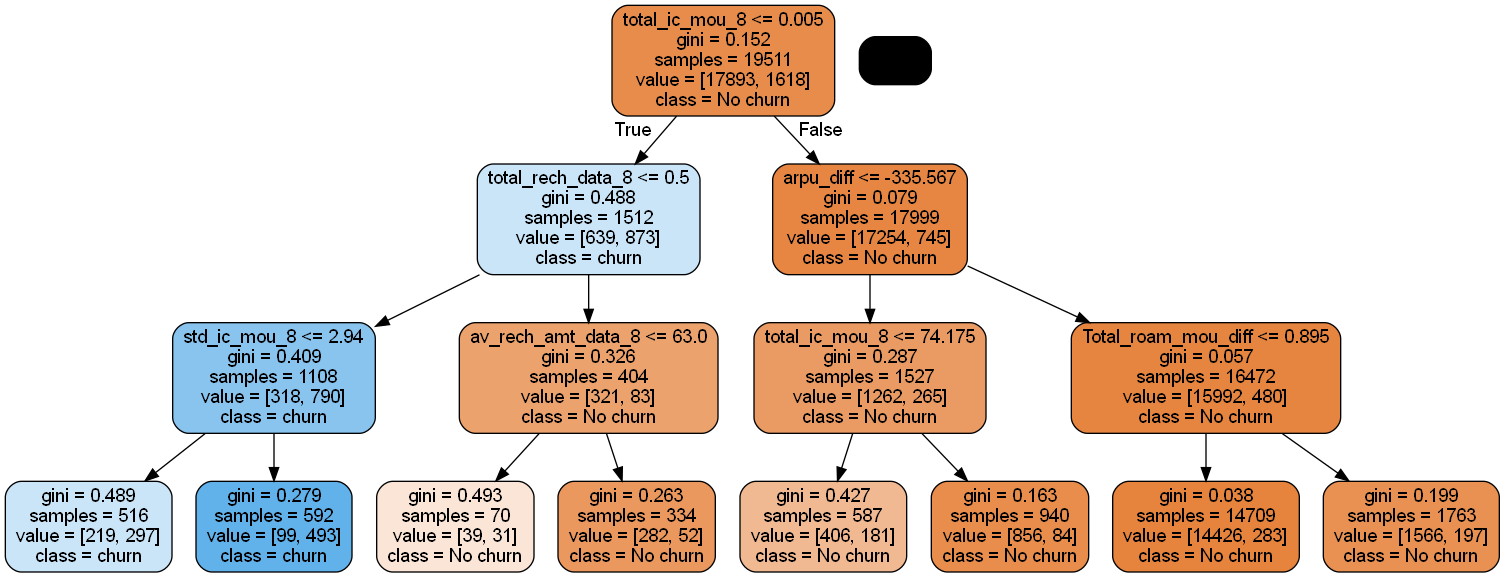

In [166]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=x_train_rf.columns, 
                class_names=['No churn', "churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [167]:
y_pred_dt = dt.predict(x_test_rf)
y_train_pred_dt = dt.predict(x_train_rf)

In [168]:
get_metrics(y_train_rf,y_train_pred_dt,y_test_rf,y_pred_dt)

Train Accuracy : 0.9412639024140229
Train Confusion Matrix:
[[17575   318]
 [  828   790]]
F1 Train score:  0.5796038151137197
Train Recall:  0.48825710754017304
Train Precision:  0.7129963898916968

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17893
           1       0.71      0.49      0.58      1618

    accuracy                           0.94     19511
   macro avg       0.83      0.74      0.77     19511
weighted avg       0.93      0.94      0.94     19511

--------------------------------------------------
Test Accuracy : 0.9454182041820418
Test Confusion Matrix:
[[5874   91]
 [ 264  275]]
Test F1 score:  0.6077348066298343
Test Recall:  0.5102040816326531
Test Precision:  0.7513661202185792

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5965
           1       0.75      0.51      0.61       539

    accuracy        

## Random forest Model ##

In [169]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
rf.fit(x_train_rf, y_train_rf)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [170]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [171]:
sample_tree = rf.estimators_[3]

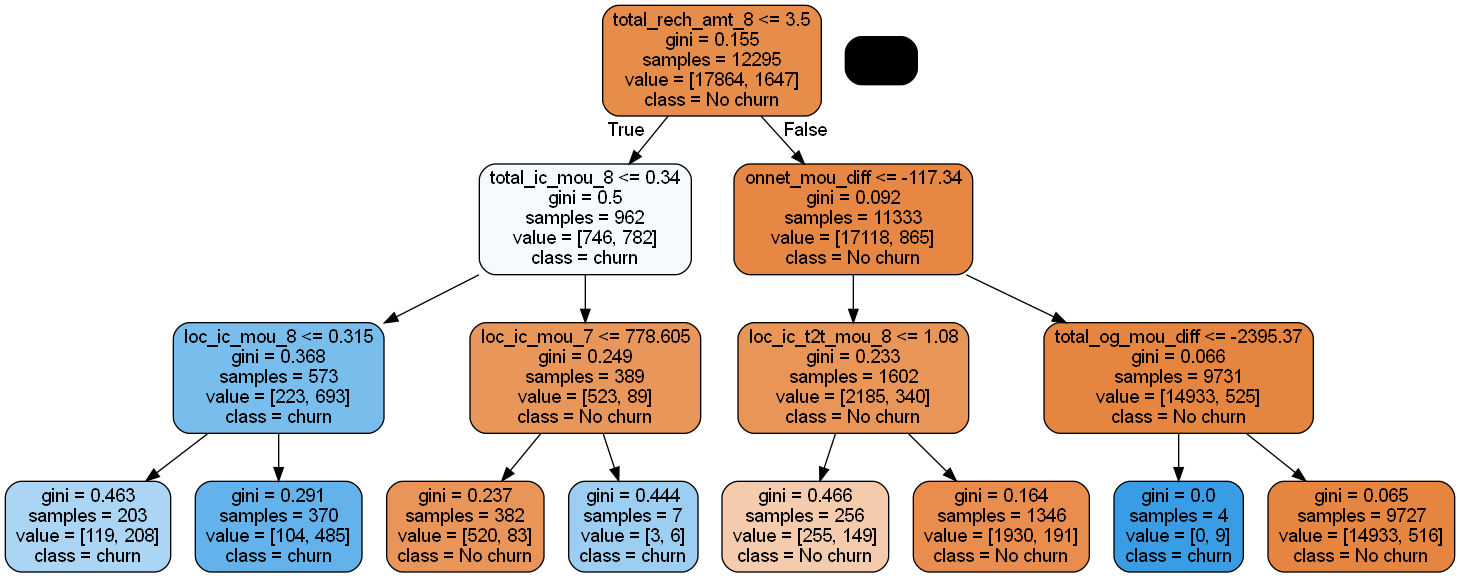

In [172]:
dot_data = StringIO()  

export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
               feature_names=x_train_rf.columns, 
               class_names=['No churn', "churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [173]:
y_pred_rf = rf.predict(x_test_rf)
y_train_pred_rf = rf.predict(x_train_rf)

In [174]:
get_metrics(y_train_rf,y_train_pred_rf,y_test_rf,y_pred_rf)

Train Accuracy : 0.9344472348931372
Train Confusion Matrix:
[[17781   112]
 [ 1167   451]]
F1 Train score:  0.4135717560751948
Train Recall:  0.27873918417799753
Train Precision:  0.8010657193605684

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     17893
           1       0.80      0.28      0.41      1618

    accuracy                           0.93     19511
   macro avg       0.87      0.64      0.69     19511
weighted avg       0.93      0.93      0.92     19511

--------------------------------------------------
Test Accuracy : 0.9338868388683886
Test Confusion Matrix:
[[5934   31]
 [ 399  140]]
Test F1 score:  0.3943661971830986
Test Recall:  0.2597402597402597
Test Precision:  0.8187134502923976

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      5965
           1       0.82      0.26      0.39       539

    accuracy        

 From the above metrices accuracy is at 93% and as the data of Churn is imbalanced we cannot go with this model. 
 proceeding to handle imbalances of data 

## Handling Imbalances for Randomforest ##

In [175]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
x_resampled_us, y_resampled_us = under_sample.fit_resample(x_train_rf, y_train_rf)
print(len(x_resampled_us) ,len(y_resampled_us))


3236 3236


In [186]:
rf_us = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

rf_us.fit(x_resampled_us, y_resampled_us)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [187]:
sample_tree = rf_us.estimators_[3]

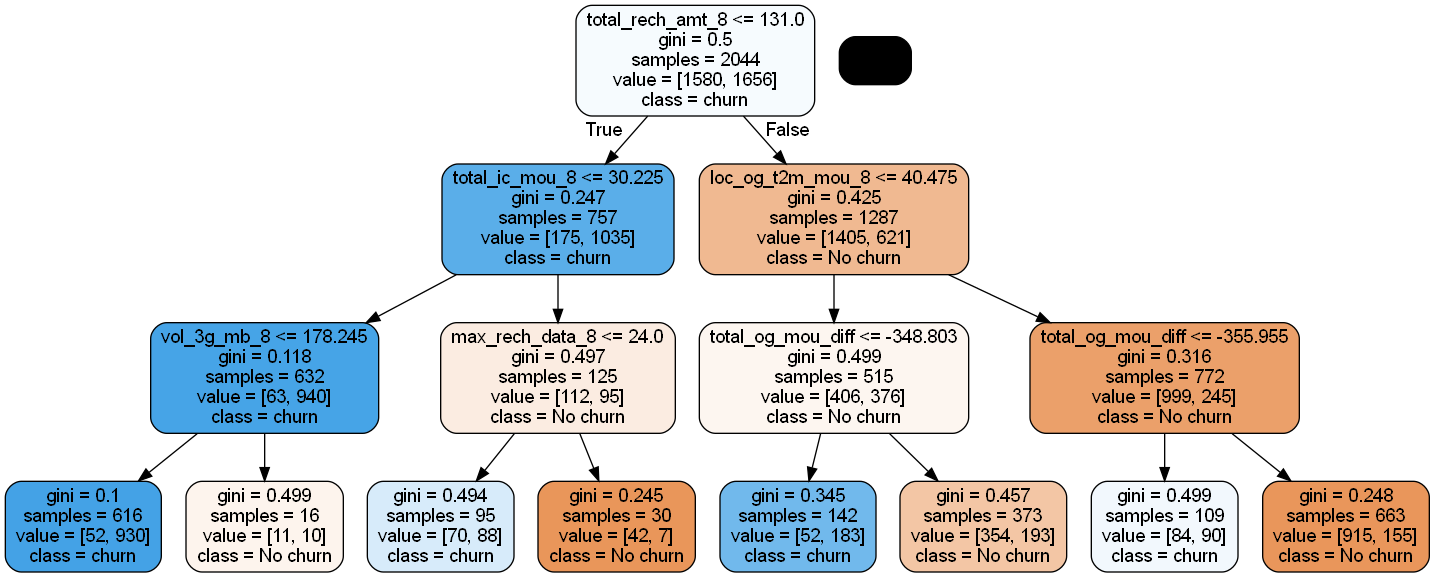

In [188]:
dot_data = StringIO()  

export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
               feature_names=x_train_rf.columns, 
               class_names=['No churn', "churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [189]:
y_pred_rf = rf_us.predict(x_test_rf)
y_train_pred_rf = rf_us.predict(x_train_rf)

In [190]:
get_metrics(y_train_rf,y_train_pred_rf,y_test_rf,y_pred_rf)

Train Accuracy : 0.8818102608784788
Train Confusion Matrix:
[[15906  1987]
 [  319  1299]]
F1 Train score:  0.5297716150081566
Train Recall:  0.8028430160692213
Train Precision:  0.3953134510042605

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93     17893
           1       0.40      0.80      0.53      1618

    accuracy                           0.88     19511
   macro avg       0.69      0.85      0.73     19511
weighted avg       0.93      0.88      0.90     19511

--------------------------------------------------
Test Accuracy : 0.8759225092250923
Test Confusion Matrix:
[[5271  694]
 [ 113  426]]
Test F1 score:  0.5135623869801085
Test Recall:  0.7903525046382189
Test Precision:  0.38035714285714284

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      5965
           1       0.38      0.79      0.51       539

    accuracy        

Metrics looks better after applying imbalance method. Next step is to proceed with Hyper parameter tuning to get the best score and best estimator.

## Hyperparameter tuning using Cross validation ##

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
rf_cv = RandomForestClassifier(random_state=42, n_jobs=-1)

In [183]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [184]:
model_cv = GridSearchCV(estimator=rf_cv, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [191]:
model_cv.fit(x_resampled_us, y_resampled_us)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [195]:
model_cv.best_score_

0.8544478791001202

In [196]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=20,
                       n_estimators=80, n_jobs=-1, random_state=42)

In [197]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

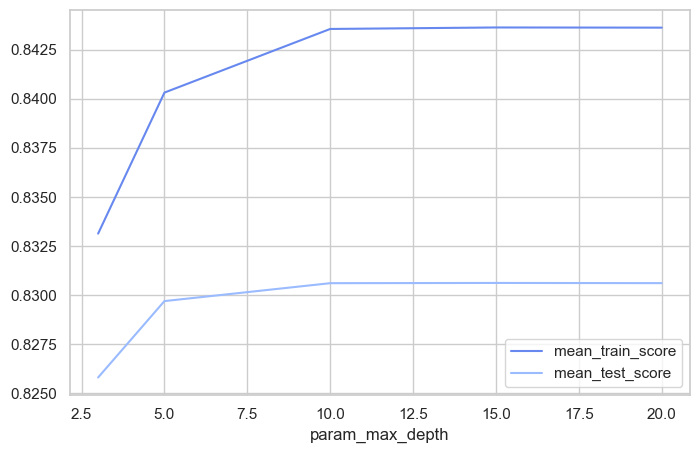

In [198]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

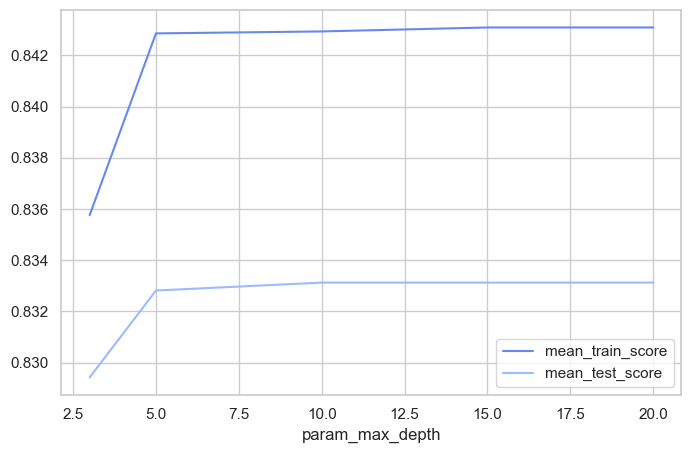

In [199]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].median().plot(figsize=[8,5])
plt.show()

From the above observations we can consider max depth as 10

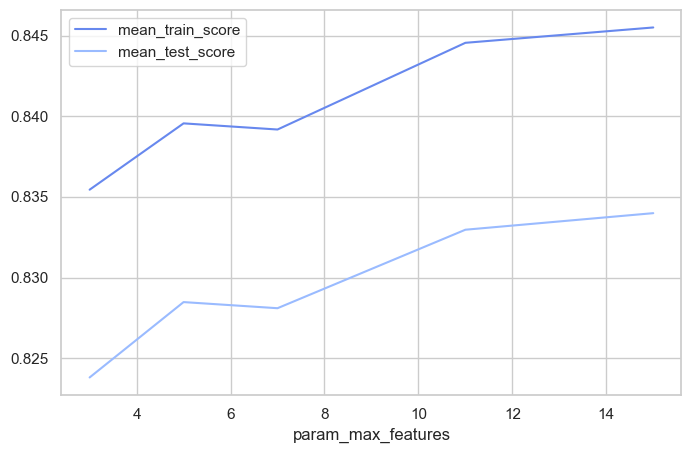

In [200]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

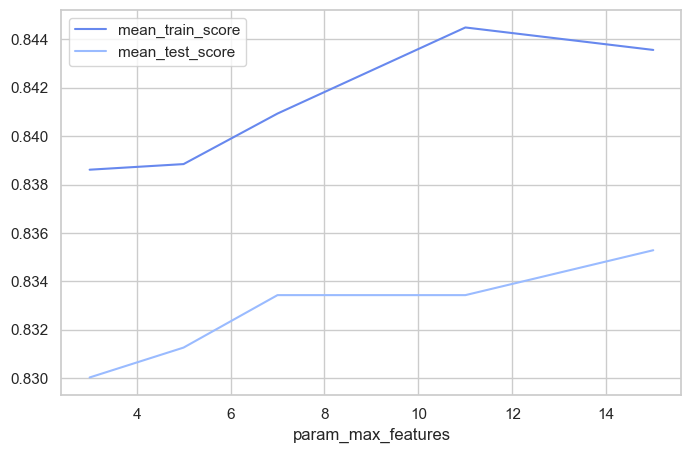

In [201]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

From the above observations we can consider max features as 11 for the model building

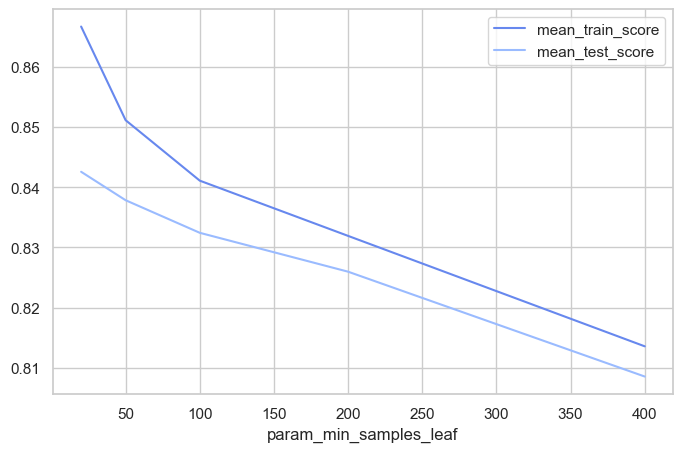

In [202]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score', 'mean_test_score'].mean(np.median).plot(figsize=[8,5])
plt.show()

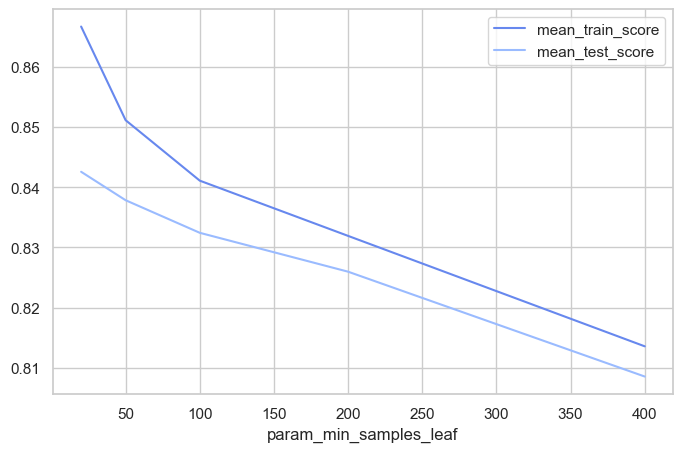

In [203]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

In [204]:
## evaluating the Model##
rf_best = model_cv.best_estimator_

y_cv_pred_rf = rf_best.predict(x_test_rf)
y_cv_train_pred_rf = rf_best.predict(x_train_rf)

In [205]:
get_metrics(y_train_rf,y_cv_train_pred_rf,y_test_rf,y_cv_pred_rf)

Train Accuracy : 0.8876531187535237
Train Confusion Matrix:
[[15920  1973]
 [  219  1399]]
F1 Train score:  0.5607214428857715
Train Recall:  0.8646477132262052
Train Precision:  0.4148873072360617

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     17893
           1       0.41      0.86      0.56      1618

    accuracy                           0.89     19511
   macro avg       0.70      0.88      0.75     19511
weighted avg       0.94      0.89      0.90     19511

--------------------------------------------------
Test Accuracy : 0.8808425584255842
Test Confusion Matrix:
[[5286  679]
 [  96  443]]
Test F1 score:  0.5334136062612884
Test Recall:  0.8218923933209648
Test Precision:  0.3948306595365419

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      5965
           1       0.39      0.82      0.53       539

    accuracy         

## Hyper parameters tuning using Grid search method ##

In [206]:
hyper_parameters = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
}


In [207]:
rf_gs = RandomForestClassifier( random_state=42, n_jobs=-1)

In [208]:
model_cv2 = GridSearchCV(estimator=rf_gs,
                        param_grid=hyper_parameters,
                        verbose=1,
                        cv=5,
                        return_train_score=True,
                        n_jobs=-1)

In [209]:
model_cv2.fit(x_resampled_us, y_resampled_us)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [210]:
model_cv2.best_score_

0.8544478791001202

In [211]:
model_cv2.best_estimator_

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=20,
                       n_estimators=80, n_jobs=-1, random_state=42)

In [212]:
## evaluating the Model##
rf_best = model_cv2.best_estimator_

y_cv2_pred_rf = rf_best.predict(x_test_rf)
y_cv2_train_pred_rf = rf_best.predict(x_train_rf)

In [213]:
get_metrics(y_train_rf,y_cv2_train_pred_rf,y_test_rf,y_cv2_pred_rf)

Train Accuracy : 0.8876531187535237
Train Confusion Matrix:
[[15920  1973]
 [  219  1399]]
F1 Train score:  0.5607214428857715
Train Recall:  0.8646477132262052
Train Precision:  0.4148873072360617

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     17893
           1       0.41      0.86      0.56      1618

    accuracy                           0.89     19511
   macro avg       0.70      0.88      0.75     19511
weighted avg       0.94      0.89      0.90     19511

--------------------------------------------------
Test Accuracy : 0.8808425584255842
Test Confusion Matrix:
[[5286  679]
 [  96  443]]
Test F1 score:  0.5334136062612884
Test Recall:  0.8218923933209648
Test Precision:  0.3948306595365419

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      5965
           1       0.39      0.82      0.53       539

    accuracy         

In [214]:
feature_importance = pd.DataFrame({
    "Varname": x_resampled_us.columns,
    "Imp": rf_best.feature_importances_
})##

In [215]:
feature_importance.sort_values(by="Imp",ascending=False)

,Varname,Imp
89,total_ic_mou_8,0.064323
110,last_day_rch_amt_8,0.061160
59,total_og_mou_8,0.050328
5,arpu_8,0.042046
104,total_rech_amt_8,0.039738
107,max_rech_amt_8,0.036985
149,arpu_diff,0.036208
71,loc_ic_mou_8,0.035243
65,loc_ic_t2m_mou_8,0.029179
20,loc_og_t2t_mou_8,0.027973


From the Randomforest classifier Above is the list of all features ranked based on this importance in descending Order. 
Top 11 features which are listed all belong to month 8 which is action month.

From the above model of Decision Tree, Random forest and Logistic Regression , model to be chosen is logistic regression. There is slight overfitting that can be noticed with tree model and Random forest model. 

## Important Predictors

In [216]:
imp_pred = pd.DataFrame(res8.params[1:])
imp_pred.columns = ['coefficient']
imp_pred.index.names = ['predictors']

In [217]:
imp_pred

,coefficient
predictors,
total_ic_mou_8,-18.749971
spl_ic_mou_8,-6.085383
total_rech_num_8,-5.514453
last_day_rch_amt_8,-4.338163
total_rech_data_8,-6.503322
vol_2g_mb_8,-5.021455
monthly_2g_8,-5.667279
aug_vbc_3g,-4.600100


**There are a total of 8 important predictors, out of which 7 of them include 8th month (action month). All the 8 variables have negative coefficients, that means, the variables are inversely correlated with the churn probablity**

**For example, if the minutes of incoming voice calls is less in the 8th month comparitively to other months then the probability of the customer churning is high.**


## Recommended strategies to manage cutsomer churn

1. Cutomers with diminishing minutes of incoming voice calls and special calls, specially in the month of august must be targeted as they have a high possibilty of churning.
<br>

2. A decrease in the total recharge of the customer and recharge of data, specifically in the 8th month is another indicator of customer churning. Therefore, such customers should be provided with additional offers.
<br>

3. A reduction in the consumption of the volume of the 2G internet hints towards the possibility of customer churning. Such customers must be offered various internet packages at low costs.
<br>

4. Customers with a 3G network whose volume based usage, i.e. charged as per their usage, drops in the month of August are likely to churn. Various 3G packages can be targeted towards this bunch of customers.
<br>

5. In addition telecom company can offer discounts on calls , set campaigns, offer discounted roaming rates and ensure good quality services.
